In [244]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopy.distance import geodesic

In [87]:
# main csv file
df = pd.read_csv('housing.csv')
# auxiliary csv files
cal_cities = pd.read_csv('cal_cities_lat_long.csv')
cal_pops_cities = pd.read_csv('cal_populations_city.csv')
cal_pops_counties = pd.read_csv('cal_populations_county.csv')

In [88]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [89]:
df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [91]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [92]:
df[['ocean_proximity']].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [93]:
# df['ocean_proximity'][df['ocean_proximity'] == '<1H OCEAN'] = 'WITHIN HOUR TO OCEAN'
df.loc[df['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = 'WITHIN HOUR TO OCEAN'

In [94]:
df[['ocean_proximity']].value_counts()

ocean_proximity     
WITHIN HOUR TO OCEAN    9136
INLAND                  6551
NEAR OCEAN              2658
NEAR BAY                2290
ISLAND                     5
dtype: int64

In [95]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [96]:
df[['total_bedrooms']].describe()

total_bedrooms
count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000

array([[<Axes: title={'center': 'total_bedrooms'}>]], dtype=object)

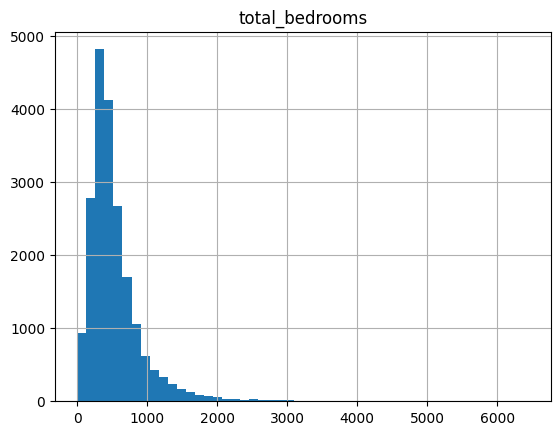

In [97]:
# looking at the histogram, we can see that the data is skewed to the right
df[['total_bedrooms']].hist(bins=50)

<Axes: >

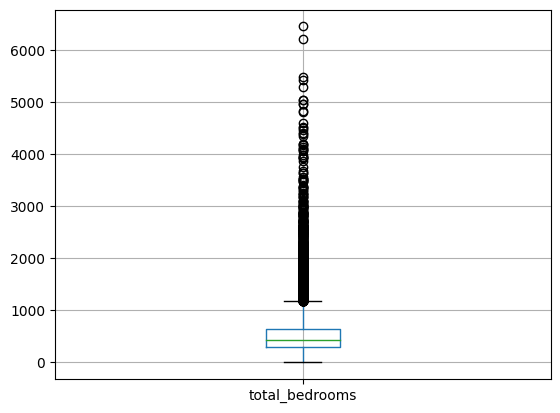

In [98]:
df[['total_bedrooms']].boxplot()

In [99]:
# let's fill the missing values with the median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)   

In [100]:
df.isnull().sum() # no more missing values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [101]:
# now that we have all our data, let's investigate even further
# we'll start by looking at the correlation between the variables
number_cols = df.select_dtypes(include=['int64', 'float64'])
number_cols.drop(['longitude', 'latitude'], axis=1, inplace=True)
number_cols.corr()

housing_median_age  total_rooms  total_bedrooms  \
housing_median_age            1.000000    -0.361262       -0.319026   
total_rooms                  -0.361262     1.000000        0.927058   
total_bedrooms               -0.319026     0.927058        1.000000   
population                   -0.296244     0.857126        0.873535   
households                   -0.302916     0.918484        0.974366   
median_income                -0.119034     0.198050       -0.007617   
median_house_value            0.105623     0.134153        0.049457   

                    population  households  median_income  median_house_value  
housing_median_age   -0.296244   -0.302916      -0.119034            0.105623  
total_rooms           0.857126    0.918484       0.198050            0.134153  
total_bedrooms        0.873535    0.974366      -0.007617            0.049457  
population            1.000000    0.907222       0.004834           -0.024650  
households            0.907222    1.000000       0.013033            0.065843  
median_income         0.004834    0.013033       1.000000            0.688075  
median_house_value   -0.024650    0.065843       0.688075            1.000000

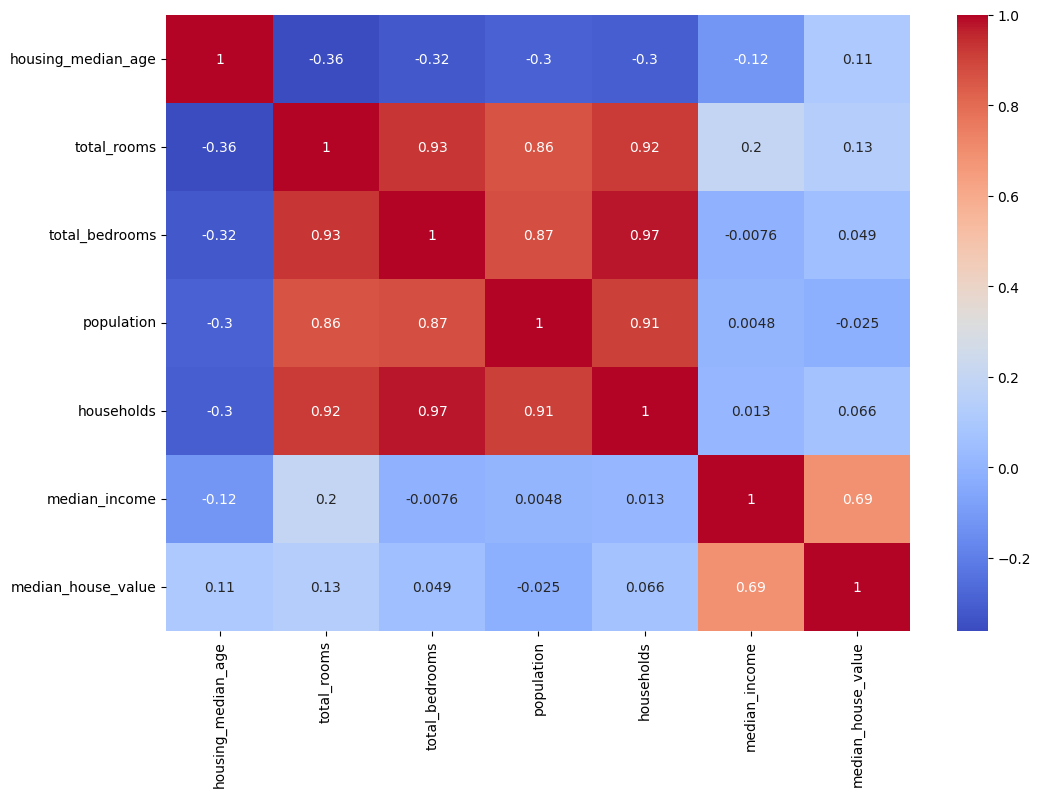

In [102]:
# let's create a correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(number_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

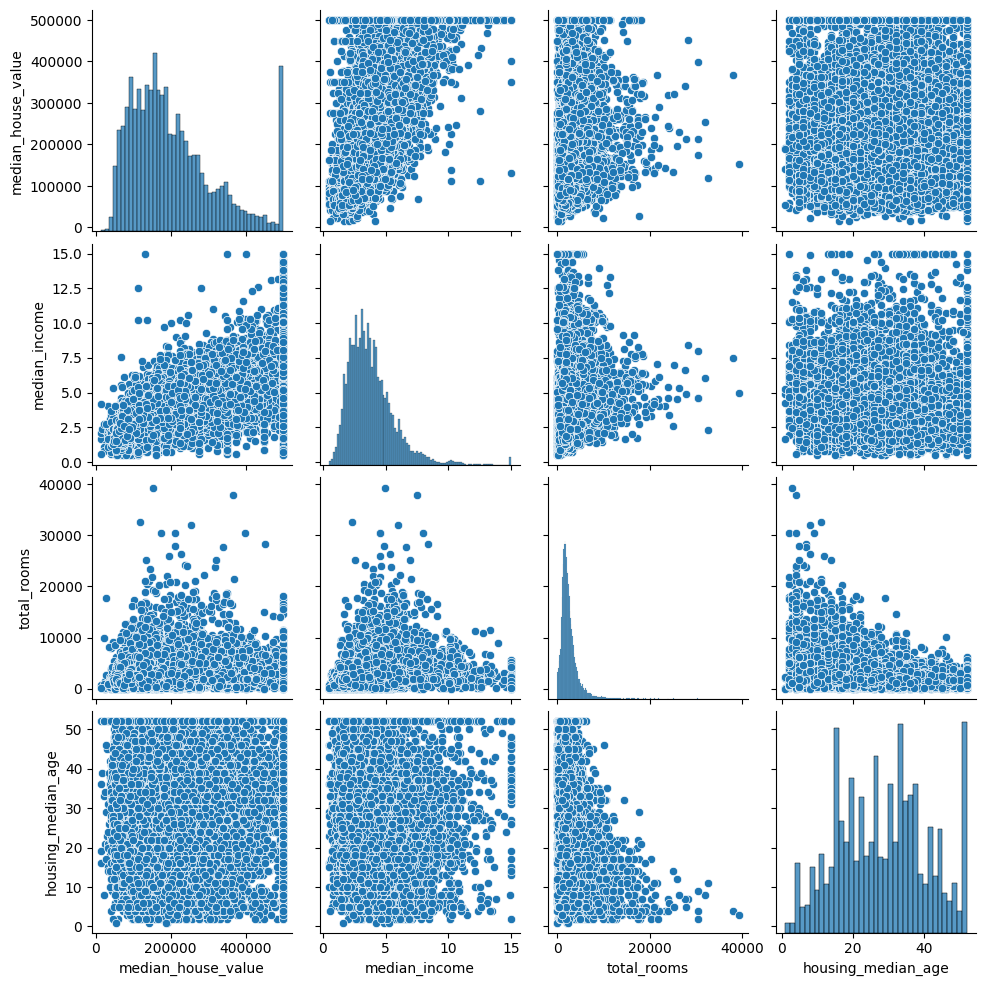

In [103]:
# let's look at the scatter plots of the variables that are highly correlated
sns.pairplot(number_cols[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']])
plt.show()

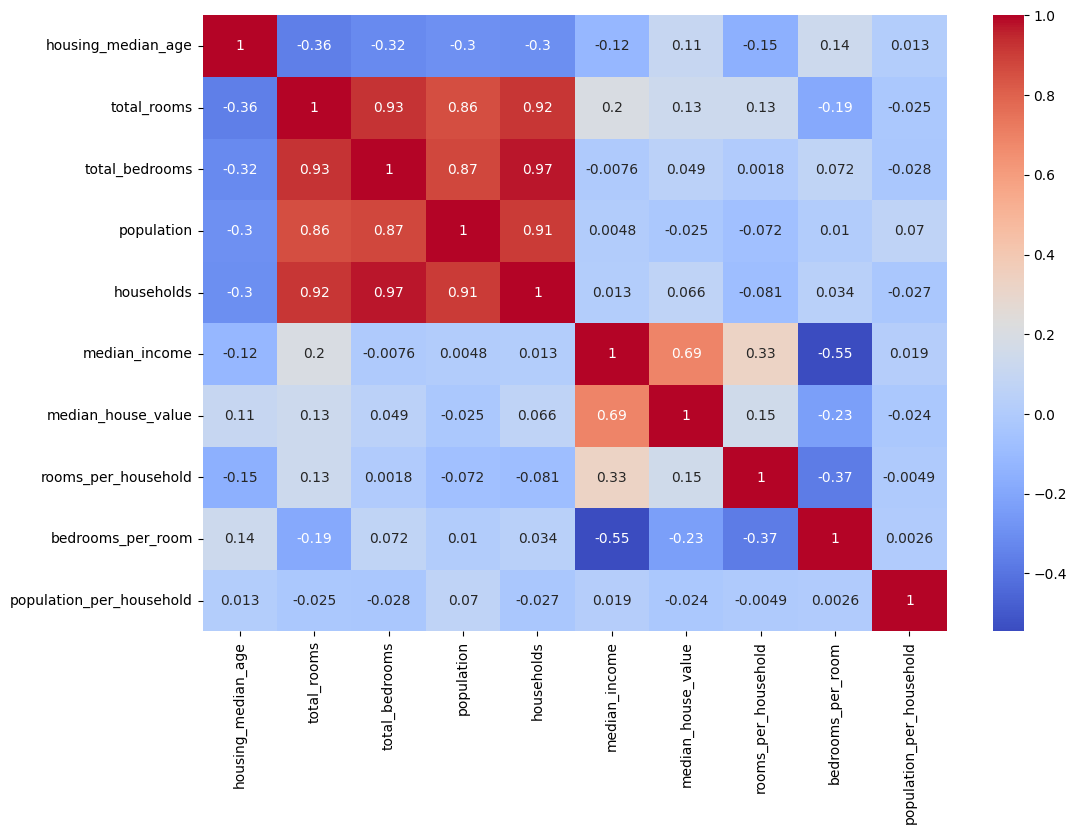

In [104]:
# let's do some feature engineering
# we'll start by creating a new variable that will be the ratio of total_rooms to households
df['rooms_per_household'] = df['total_rooms'] / df['households']

# let's create another variable that will be the ratio of total_bedrooms to total_rooms
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# let's create another variable that will be the ratio of population to households
df['population_per_household'] = df['population'] / df['households']

# let's look at the correlation matrix again
plt.figure(figsize=(12, 8))
number_cols = df.select_dtypes(include=['int64', 'float64'])
number_cols.drop(['longitude', 'latitude'], axis=1, inplace=True)
sns.heatmap(number_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

In [105]:
# Is total_rooms still necessary?
df.drop(['total_rooms'], axis=1, inplace=True)

In [106]:
# Is total_bedrooms still necessary?
df.drop(['total_bedrooms'], axis=1, inplace=True)

In [107]:
# Is population still necessary?
# df.drop(['population'], axis=1, inplace=True)
# I think it's still necessary

In [108]:
# Is households still necessary?
df.drop(['households'], axis=1, inplace=True)

In [109]:
df.head()

longitude  latitude  housing_median_age  population  median_income  \
0    -122.23     37.88                41.0       322.0         8.3252   
1    -122.22     37.86                21.0      2401.0         8.3014   
2    -122.24     37.85                52.0       496.0         7.2574   
3    -122.25     37.85                52.0       558.0         5.6431   
4    -122.25     37.85                52.0       565.0         3.8462   

   median_house_value ocean_proximity  rooms_per_household  bedrooms_per_room  \
0            452600.0        NEAR BAY             6.984127           0.146591   
1            358500.0        NEAR BAY             6.238137           0.155797   
2            352100.0        NEAR BAY             8.288136           0.129516   
3            341300.0        NEAR BAY             5.817352           0.184458   
4            342200.0        NEAR BAY             6.281853           0.172096   

   population_per_household  
0                  2.555556  
1                  2.109842  
2                  2.802260  
3                  2.547945  
4                  2.181467

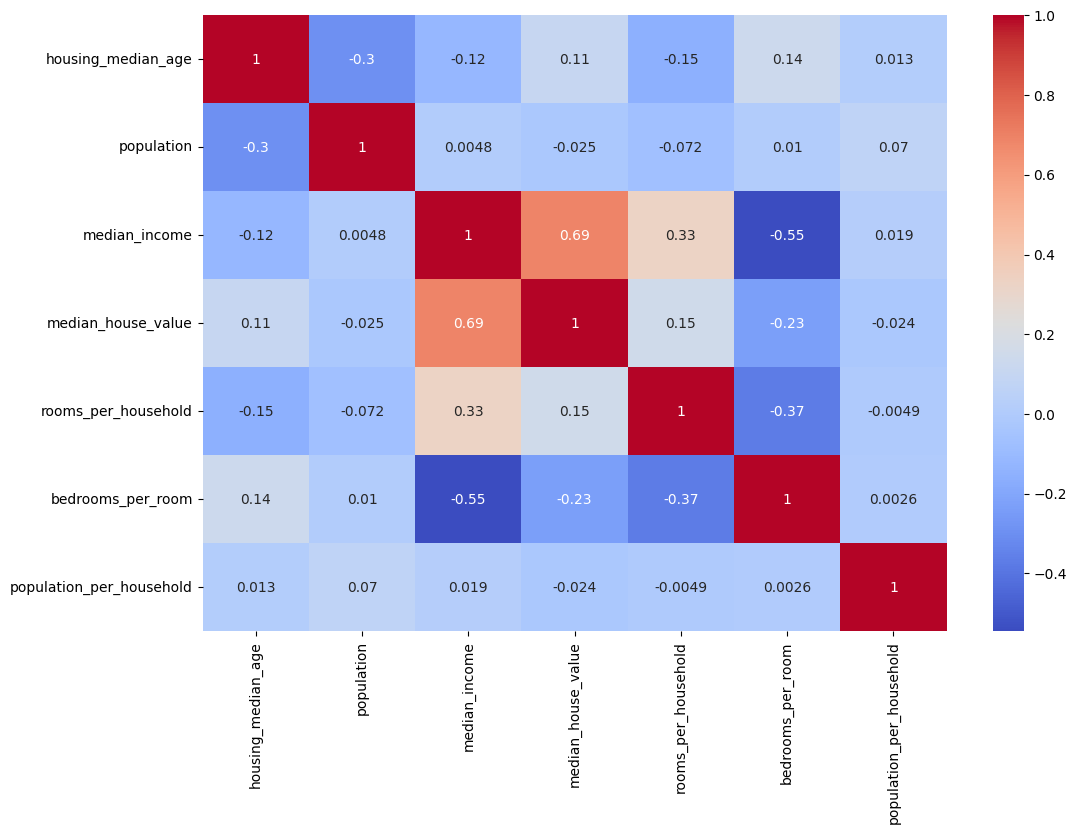

In [110]:
# let's look at the correlation matrix again
plt.figure(figsize=(12, 8))
number_cols = df.select_dtypes(include=['int64', 'float64'])
number_cols.drop(['longitude', 'latitude'], axis=1, inplace=True)
sns.heatmap(number_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

In [275]:
# let's make geographical plots
# let's start by looking at the geographical distribution of the median house value

# Load the California shapefile
cali_shp = gpd.read_file('CA_Counties\CA_Counties_TIGER2016.shp')

# Create the GeoDataFrame for your points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs=cali_shp.crs)

# Set the CRS of the points GeoDataFrame to match the CRS of the California GeoDataFrame
gdf.set_crs(cali_shp.crs, inplace=True)

longitude  latitude  housing_median_age  population  median_income  \
0        -122.23     37.88                41.0       322.0         8.3252   
1        -122.22     37.86                21.0      2401.0         8.3014   
2        -122.24     37.85                52.0       496.0         7.2574   
3        -122.25     37.85                52.0       558.0         5.6431   
4        -122.25     37.85                52.0       565.0         3.8462   
...          ...       ...                 ...         ...            ...   
20635    -121.09     39.48                25.0       845.0         1.5603   
20636    -121.21     39.49                18.0       356.0         2.5568   
20637    -121.22     39.43                17.0      1007.0         1.7000   
20638    -121.32     39.43                18.0       741.0         1.8672   
20639    -121.24     39.37                16.0      1387.0         2.3886   

       median_house_value ocean_proximity  rooms_per_household  \
0                452600.0        NEAR BAY             6.984127   
1                358500.0        NEAR BAY             6.238137   
2                352100.0        NEAR BAY             8.288136   
3                341300.0        NEAR BAY             5.817352   
4                342200.0        NEAR BAY             6.281853   
...                   ...             ...                  ...   
20635             78100.0          INLAND             5.045455   
20636             77100.0          INLAND             6.114035   
20637             92300.0          INLAND             5.205543   
20638             84700.0          INLAND             5.329513   
20639             89400.0          INLAND             5.254717   

       bedrooms_per_room  population_per_household                 geometry  
0               0.146591                  2.555556  POINT (-122.230 37.880)  
1               0.155797                  2.109842  POINT (-122.220 37.860)  
2               0.129516                  2.802260  POINT (-122.240 37.850)  
3               0.184458                  2.547945  POINT (-122.250 37.850)  
4               0.172096                  2.181467  POINT (-122.250 37.850)  
...                  ...                       ...                      ...  
20635           0.224625                  2.560606  POINT (-121.090 39.480)  
20636           0.215208                  3.122807  POINT (-121.210 39.490)  
20637           0.215173                  2.325635  POINT (-121.220 39.430)  
20638           0.219892                  2.123209  POINT (-121.320 39.430)  
20639           0.221185                  2.616981  POINT (-121.240 39.370)  

[20640 rows x 11 columns]

In [276]:
# Load the California shapefile
# cali = gpd.read_file('CA_Counties\CA_Counties_TIGER2016.shp')
cali_shp = gpd.read_file('CA_Counties\CA_Counties_TIGER2016.shp')
cali_shp = cali_shp.to_crs("EPSG:4326")

# Create the GeoDataFrame for your points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs=cali_shp.crs)
gdf = gdf.to_crs("EPSG:4326")

<Axes: xlabel='longitude', ylabel='latitude'>

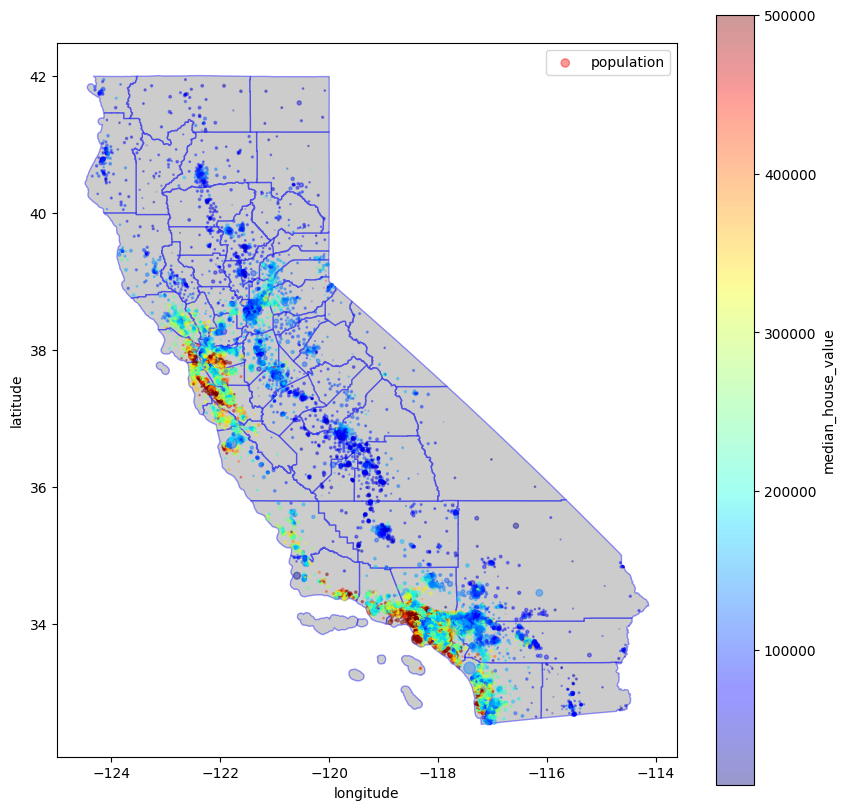

In [277]:
# Plotting
ax = cali_shp.plot(color='grey',figsize=(10, 10), alpha=0.4, edgecolor='blue')
# gdf.plot(ax=ax, color='red')
gdf.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.4, s=gdf['population']/500, label='population', figsize=(10,10), 
                        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)


<Axes: xlabel='longitude', ylabel='latitude'>

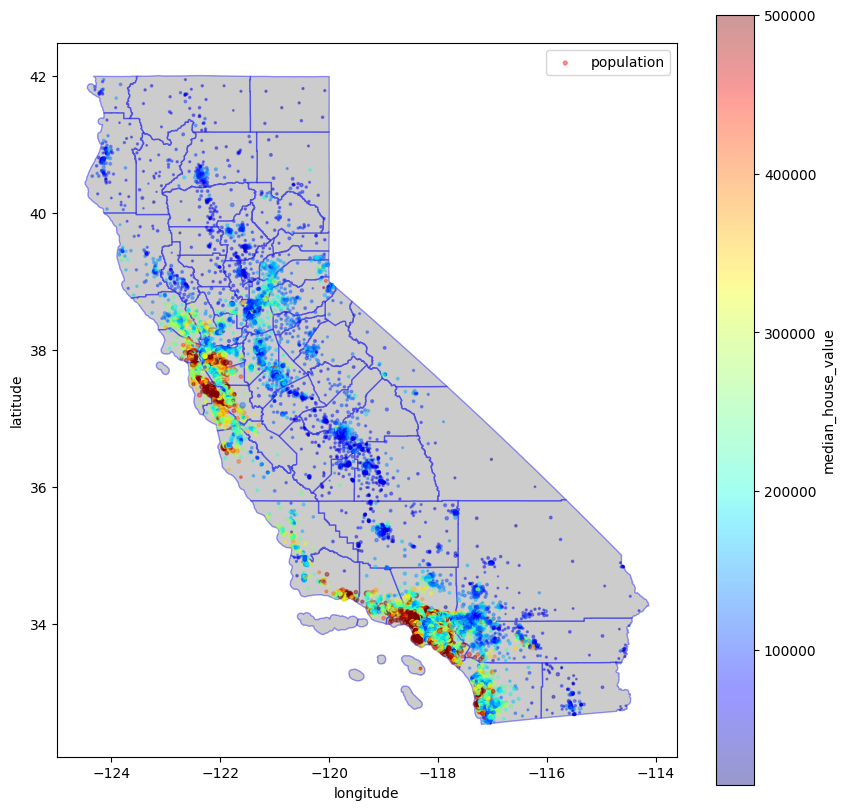

In [278]:
ax = cali_shp.plot(color='grey',figsize=(10, 10), alpha=0.4, edgecolor='blue')
gdf.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.4, s=gdf['median_income']/1, label='population', figsize=(10,10), 
                        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

<Axes: xlabel='longitude', ylabel='latitude'>

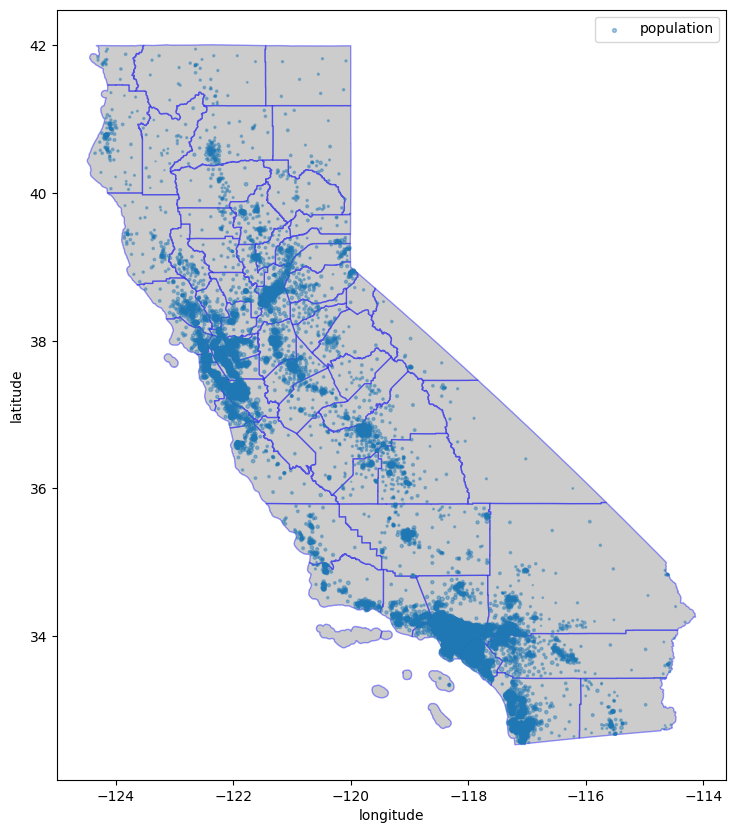

In [279]:
# let's look at the geographical distribution of the median income
ax = cali_shp.plot(color='grey',figsize=(10, 10), alpha=0.4, edgecolor='blue')
gdf.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.4, s=gdf['median_income']/1, label='population', figsize=(10,10))

In [280]:
cal_cities.head()

Name   Latitude   Longitude
0      Adelanto  34.582769 -117.409214
1  Agoura Hills  34.153339 -118.761675
2       Alameda  37.765206 -122.241636
3        Albany  37.886869 -122.297747
4      Alhambra  34.095286 -118.127014

In [281]:
cal_pops_cities.head()

County          City Incorportation_date  pop_april_1980  \
0  San Bernardino      Adelanto                1970          2164.0   
1     Los Angeles  Agoura Hills                1982             NaN   
2         Alameda       Alameda                1854         63852.0   
3         Alameda        Albany                1908         15130.0   
4     Los Angeles      Alhambra                1903         64767.0   

   pop_april_1990  pop_april_2000  pop_april_2010  
0            8517           18130           31765  
1           20390           20537           20330  
2           76459           72259           73812  
3           16327           16444           18539  
4           82106           85804           83089

In [282]:
cal_pops_counties.head()

County          City Incorportation_date  pop_april_1980  \
0  San Bernardino      Adelanto                1970          2164.0   
1     Los Angeles  Agoura Hills                1982             NaN   
2         Alameda       Alameda                1854         63852.0   
3         Alameda        Albany                1908         15130.0   
4     Los Angeles      Alhambra                1903         64767.0   

   pop_april_1990  pop_april_2000  pop_april_2010  
0            8517           18130           31765  
1           20390           20537           20330  
2           76459           72259           73812  
3           16327           16444           18539  
4           82106           85804           83089

In [283]:
from collections import namedtuple

CityTuple = namedtuple('City', ['Name', 'Latitude', 'Longitude','pop_april_1980', 'pop_april_1990', 'pop_april_2000', 'pop_april_2010'])

city_map = dict()
for index, row in cal_cities.iterrows():
    city_map[row['Name']] = CityTuple(row['Name'], row['Latitude'], row['Longitude'], 0, 0, 0, 0)

In [284]:
city_map

{'Adelanto': City(Name='Adelanto', Latitude=34.582769, Longitude=-117.409214, pop_april_1980=0, pop_april_1990=0, pop_april_2000=0, pop_april_2010=0),
 'Agoura Hills': City(Name='Agoura Hills', Latitude=34.153339, Longitude=-118.761675, pop_april_1980=0, pop_april_1990=0, pop_april_2000=0, pop_april_2010=0),
 'Alameda': City(Name='Alameda', Latitude=37.765206, Longitude=-122.241636, pop_april_1980=0, pop_april_1990=0, pop_april_2000=0, pop_april_2010=0),
 'Albany': City(Name='Albany', Latitude=37.886869, Longitude=-122.297747, pop_april_1980=0, pop_april_1990=0, pop_april_2000=0, pop_april_2010=0),
 'Alhambra': City(Name='Alhambra', Latitude=34.095286, Longitude=-118.127014, pop_april_1980=0, pop_april_1990=0, pop_april_2000=0, pop_april_2010=0),
 'Aliso Viejo': City(Name='Aliso Viejo', Latitude=33.575, Longitude=-117.725556, pop_april_1980=0, pop_april_1990=0, pop_april_2000=0, pop_april_2010=0),
 'Alturas': City(Name='Alturas', Latitude=41.487114, Longitude=-120.542456, pop_april_198

In [285]:
for index, row in cal_pops_cities.iterrows():
    if row['City'] in city_map:
        tuple_ = city_map[row['City']]
        tuple_ = tuple_._replace(pop_april_1980=row['pop_april_1980'], pop_april_1990=row['pop_april_1990'], pop_april_2000=row['pop_april_2000'], pop_april_2010=row['pop_april_2010'])
        city_map[row['City']] = tuple_

In [286]:
city_map

{'Adelanto': City(Name='Adelanto', Latitude=34.582769, Longitude=-117.409214, pop_april_1980=2164.0, pop_april_1990=8517, pop_april_2000=18130, pop_april_2010=31765),
 'Agoura Hills': City(Name='Agoura Hills', Latitude=34.153339, Longitude=-118.761675, pop_april_1980=nan, pop_april_1990=20390, pop_april_2000=20537, pop_april_2010=20330),
 'Alameda': City(Name='Alameda', Latitude=37.765206, Longitude=-122.241636, pop_april_1980=63852.0, pop_april_1990=76459, pop_april_2000=72259, pop_april_2010=73812),
 'Albany': City(Name='Albany', Latitude=37.886869, Longitude=-122.297747, pop_april_1980=15130.0, pop_april_1990=16327, pop_april_2000=16444, pop_april_2010=18539),
 'Alhambra': City(Name='Alhambra', Latitude=34.095286, Longitude=-118.127014, pop_april_1980=64767.0, pop_april_1990=82106, pop_april_2000=85804, pop_april_2010=83089),
 'Aliso Viejo': City(Name='Aliso Viejo', Latitude=33.575, Longitude=-117.725556, pop_april_1980=0, pop_april_1990=0, pop_april_2000=0, pop_april_2010=0),
 'Alt

In [287]:
# We're going to create a geodataframe for the cities
from shapely.geometry import Point


tuple_list = [tuple_ for tuple_ in city_map.values()]

# Create the GeoDataFrame for your points from the tuple_list
gdf_cities = gpd.GeoDataFrame(tuple_list, geometry=gpd.points_from_xy([tuple_[2] for tuple_ in tuple_list], [tuple_[1] for tuple_ in tuple_list]), crs=cali_shp.crs)
gdf_cities = gdf_cities.to_crs("EPSG:4326")


In [348]:
# I do not want to map more geographical features like counties.
# I think the distance from large cities is enough

# let's create a new column for the distance from large cities
# first we'll plot large cities and their population

gdf_cities[['pop_april_1980','pop_april_1990','pop_april_2000','pop_april_2010']] = gdf_cities[['pop_april_1980','pop_april_1990','pop_april_2000','pop_april_2010']].astype(float)
gdf_cities['Large_City'] = gdf_cities['pop_april_2010'] > 250000
large_cities = gdf_cities[gdf_cities['Large_City'] == True]
large_cities.head()

Name   Latitude   Longitude  pop_april_1980  pop_april_1990  \
9        Anaheim  33.835292 -117.914503        219494.0        266406.0   
24   Bakersfield  35.373292 -119.018711        105611.0        174820.0   
143       Fresno  36.746842 -119.772586        217129.0        354202.0   
226   Long Beach  33.768322 -118.195617        361355.0        429433.0   
229  Los Angeles  34.052233 -118.243686       2968579.0       3485398.0   

     pop_april_2000  pop_april_2010                     geometry  Large_City  
9          328014.0        336265.0  POINT (-117.91450 33.83529)        True  
24         246889.0        347483.0  POINT (-119.01871 35.37329)        True  
143        427652.0        494665.0  POINT (-119.77259 36.74684)        True  
226        461522.0        462257.0  POINT (-118.19562 33.76832)        True  
229       3694742.0       3792621.0  POINT (-118.24369 34.05223)        True

<Axes: xlabel='Longitude', ylabel='Latitude'>

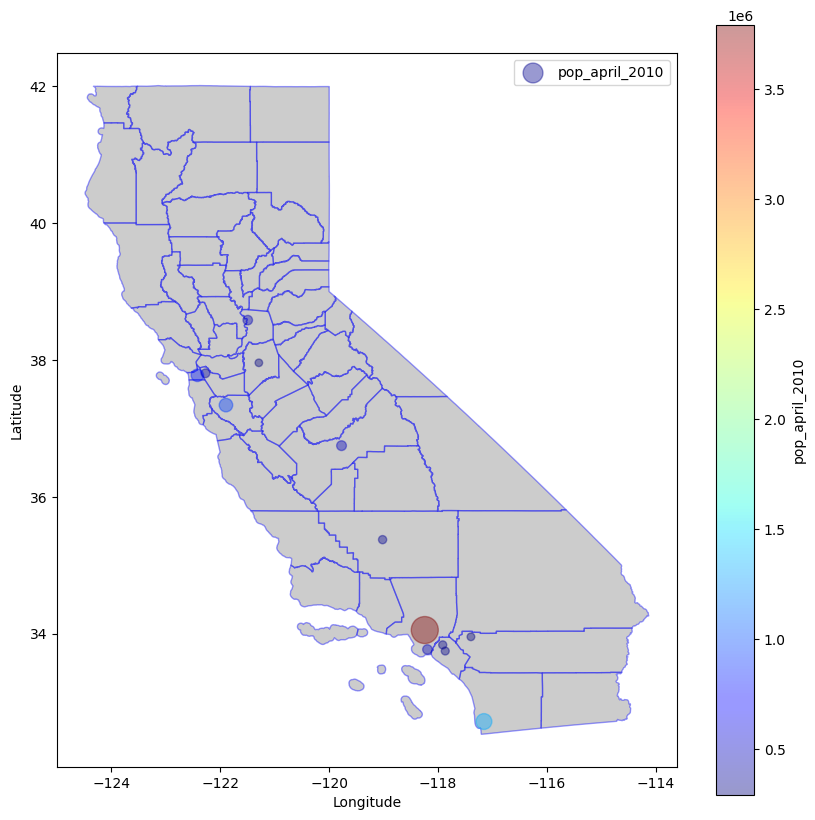

In [289]:
ax = cali_shp.plot(color='grey',figsize=(10, 10), alpha=0.4, edgecolor='blue')
# large_cities.plot(ax=ax, kind='scatter', x='Longitude', y='Latitude', alpha=0.4, s=large_cities['pop_april_2010'], label='population', figsize=(10,10))
large_cities.plot(ax=ax, kind='scatter', x='Longitude', y='Latitude', alpha=0.4, s=large_cities['pop_april_2010'] / 10000, label='pop_april_2010', figsize=(10,10), c='pop_april_2010', cmap=plt.get_cmap('jet'), colorbar=True)

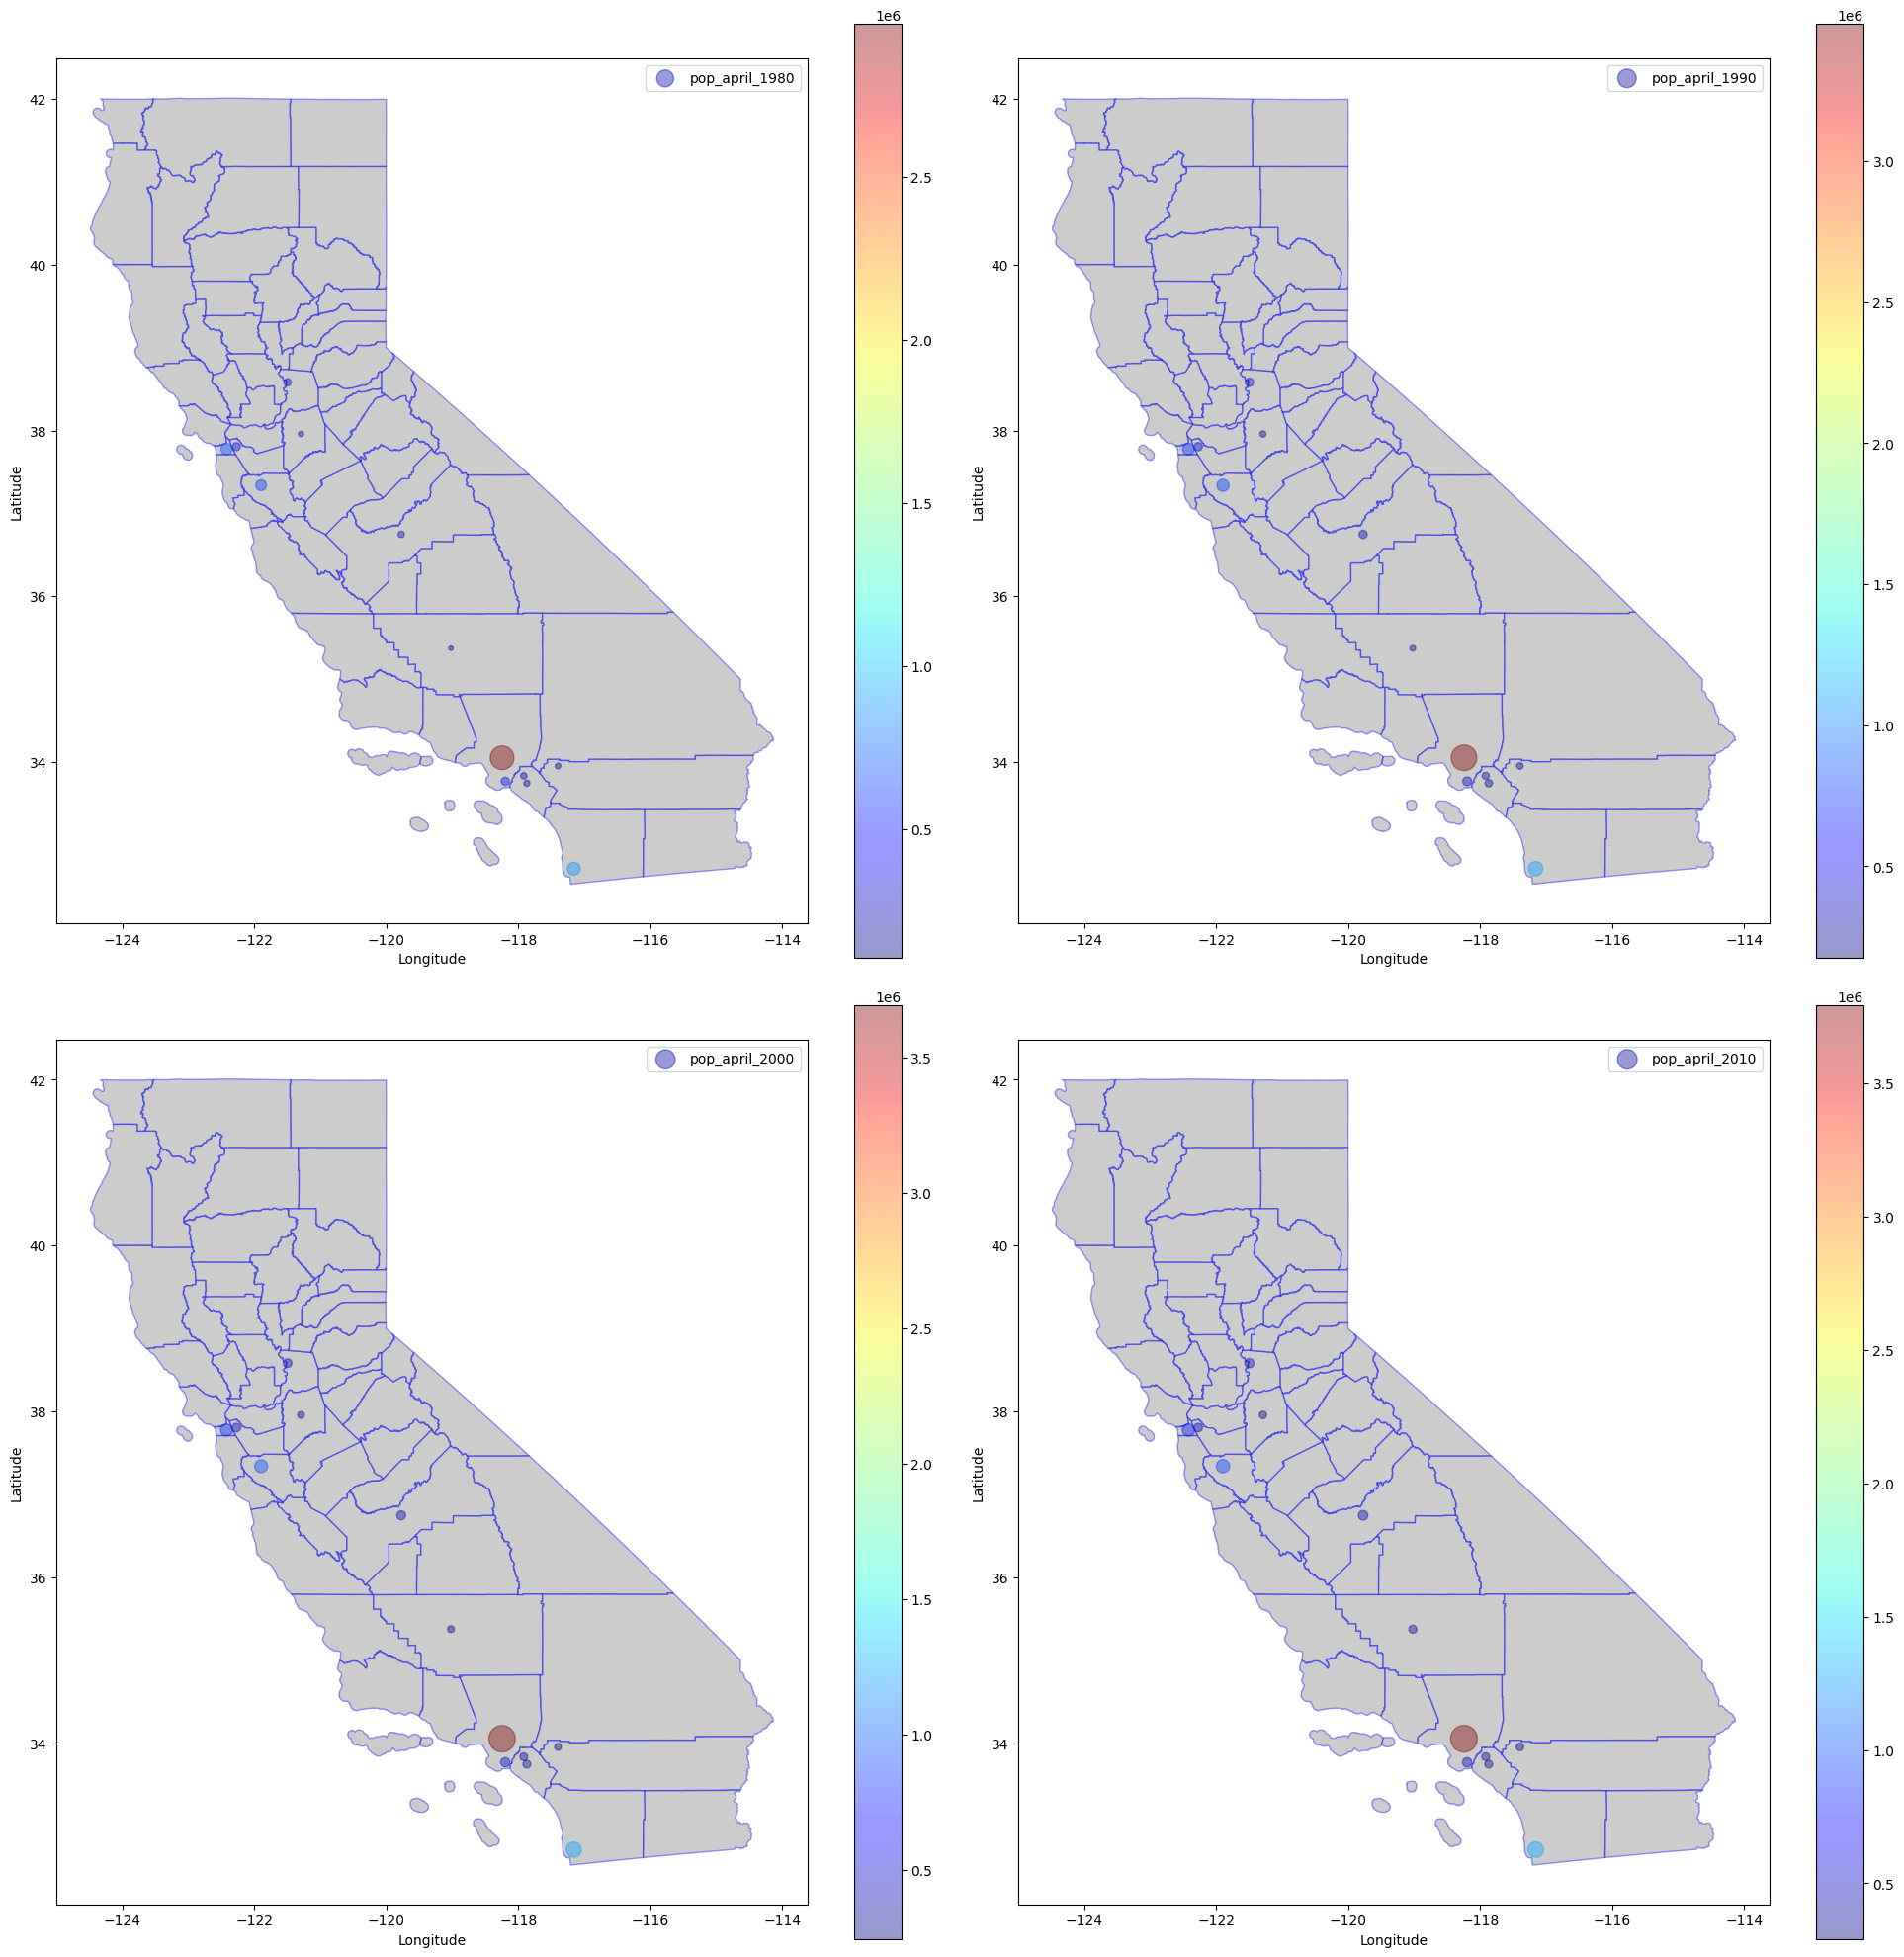

In [290]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# List of years to plot
years = ['pop_april_1980','pop_april_1990','pop_april_2000','pop_april_2010']

# Iterate over years and axes together
for ax, year in zip(axs, years):
    cali_shp.plot(color='grey', ax=ax, alpha=0.4, edgecolor='blue')
    large_cities.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4, 
                      s=large_cities[year] / 10000, label=year, ax=ax, 
                      c=large_cities[year], cmap=plt.get_cmap('jet'), colorbar=True)
    ax.legend()

# Adjust the layout
plt.tight_layout()

plt.show()


In [291]:
# Let's get the distance from large cities
from collections import OrderedDict


large_cities_lat_lon = large_cities[['Name','Latitude', 'Longitude']]
large_cities_dictionaries = large_cities_lat_lon.to_dict('records', into=OrderedDict)
large_cities_dictionaries

[OrderedDict([('Name', 'Anaheim'),
              ('Latitude', 33.835292),
              ('Longitude', -117.914503)]),
 OrderedDict([('Name', 'Bakersfield'),
              ('Latitude', 35.373292),
              ('Longitude', -119.018711)]),
 OrderedDict([('Name', 'Fresno'),
              ('Latitude', 36.746842),
              ('Longitude', -119.772586)]),
 OrderedDict([('Name', 'Long Beach'),
              ('Latitude', 33.768322),
              ('Longitude', -118.195617)]),
 OrderedDict([('Name', 'Los Angeles'),
              ('Latitude', 34.052233),
              ('Longitude', -118.243686)]),
 OrderedDict([('Name', 'Oakland'),
              ('Latitude', 37.804364),
              ('Longitude', -122.271114)]),
 OrderedDict([('Name', 'Riverside'),
              ('Latitude', 33.95335),
              ('Longitude', -117.396156)]),
 OrderedDict([('Name', 'Sacramento'),
              ('Latitude', 38.581572),
              ('Longitude', -121.4944)]),
 OrderedDict([('Name', 'San Diego'),
       

In [292]:
gdf.head()

longitude  latitude  housing_median_age  population  median_income  \
0    -122.23     37.88                41.0       322.0         8.3252   
1    -122.22     37.86                21.0      2401.0         8.3014   
2    -122.24     37.85                52.0       496.0         7.2574   
3    -122.25     37.85                52.0       558.0         5.6431   
4    -122.25     37.85                52.0       565.0         3.8462   

   median_house_value ocean_proximity  rooms_per_household  bedrooms_per_room  \
0            452600.0        NEAR BAY             6.984127           0.146591   
1            358500.0        NEAR BAY             6.238137           0.155797   
2            352100.0        NEAR BAY             8.288136           0.129516   
3            341300.0        NEAR BAY             5.817352           0.184458   
4            342200.0        NEAR BAY             6.281853           0.172096   

   population_per_household                     geometry  
0                  2.555556  POINT (-122.23000 37.88000)  
1                  2.109842  POINT (-122.22000 37.86000)  
2                  2.802260  POINT (-122.24000 37.85000)  
3                  2.547945  POINT (-122.25000 37.85000)  
4                  2.181467  POINT (-122.25000 37.85000)

In [293]:
# Need two tuples of lat and lon for city and location
# len_large_cities_dictionaries = len(large_cities_dictionaries)
# large_cities_dictionaries[0]
# large_cities_dictionaries[0]['Latitude']
# (large_cities_dictionaries[0]['Latitude'], large_cities_dictionaries[0]['Longitude'])
# tuple_large_city = (large_cities_dictionaries[0]['Latitude'], large_cities_dictionaries[0]['Longitude'])
# gdf.iloc[0].longitude

for large_city in large_cities_dictionaries:
    large_city_base_name = large_city['Name']
    large_city_base_name = large_city_base_name.replace(' ', '_').lower()
    large_city_enriched_name = large_city_base_name + '_km_distance'
    gdf[large_city_enriched_name] = gdf.apply(lambda row: geodesic((row['latitude'], row['longitude']), (large_city['Latitude'], large_city['Longitude'])).kilometers, axis=1)


In [294]:
gdf.head()

longitude  latitude  housing_median_age  population  median_income  \
0    -122.23     37.88                41.0       322.0         8.3252   
1    -122.22     37.86                21.0      2401.0         8.3014   
2    -122.24     37.85                52.0       496.0         7.2574   
3    -122.25     37.85                52.0       558.0         5.6431   
4    -122.25     37.85                52.0       565.0         3.8462   

   median_house_value ocean_proximity  rooms_per_household  bedrooms_per_room  \
0            452600.0        NEAR BAY             6.984127           0.146591   
1            358500.0        NEAR BAY             6.238137           0.155797   
2            352100.0        NEAR BAY             8.288136           0.129516   
3            341300.0        NEAR BAY             5.817352           0.184458   
4            342200.0        NEAR BAY             6.281853           0.172096   

   population_per_household  ... long_beach_km_distance  \
0                  2.555556  ...             583.841864   
1                  2.109842  ...             581.573946   
2                  2.802260  ...             581.855129   
3                  2.547945  ...             582.422564   
4                  2.181467  ...             582.422564   

   los_angeles_km_distance  oakland_km_distance  riverside_km_distance  \
0               556.364513             9.141880             616.400723   
1               554.118593             7.640713             614.234858   
2               554.458201             5.758511             614.753484   
3               555.044569             5.395591             615.395049   
4               555.044569             5.395591             615.395049   

   sacramento_km_distance  san_diego_km_distance  san_francisco_km_distance  \
0              101.057229             735.398456                  20.349081   
1              102.236601             733.137188                  19.936328   
2              104.199586             733.435457                  17.861202   
3              104.750557             734.008122                  17.087267   
4              104.750557             734.008122                  17.087267   

   san_jose_km_distance  santa_ana_km_distance  stockton_km_distance  
0             66.898490             604.702069             83.033501  
1             64.519001             602.463757             82.432585  
2             64.345139             602.821970             84.332179  
3             64.768030             603.414134             85.202847  
4             64.768030             603.414134             85.202847  

[5 rows x 24 columns]

In [319]:
# Get all column names that end with '_km_distance'
# parsed_string = s.split('_km_distance')[0].replace('_', ' ')
# distance_cols = [(col.split('_km_distance')[0].replace('_', ' '), col) for col in gdf.columns if col.endswith('_km_distance')]
distance_cols = [col for col in gdf.columns if col.endswith('_km_distance')]
distance_cols

# Select only these columns
distance_data = gdf[distance_cols]
distance_data.head()    

# # Find the minimum distance for each row
gdf['min_distance'] = distance_data.min(axis=1)
gdf['max_distance'] = distance_data.max(axis=1)

# Find the column name where column equals the min for each row
# column name must be unique in terms of distance_km since we're going to need to regex that and drop those columns to save space
gdf['min_distance_km_col'] = distance_data.idxmin(axis=1)
gdf['max_distance_km_col'] = distance_data.idxmax(axis=1)

gdf.drop(columns=distance_cols, inplace=True)


In [320]:
gdf.head()

longitude  latitude  housing_median_age  population  median_income  \
0    -122.23     37.88                41.0       322.0         8.3252   
1    -122.22     37.86                21.0      2401.0         8.3014   
2    -122.24     37.85                52.0       496.0         7.2574   
3    -122.25     37.85                52.0       558.0         5.6431   
4    -122.25     37.85                52.0       565.0         3.8462   

   median_house_value ocean_proximity  rooms_per_household  bedrooms_per_room  \
0            452600.0        NEAR BAY             6.984127           0.146591   
1            358500.0        NEAR BAY             6.238137           0.155797   
2            352100.0        NEAR BAY             8.288136           0.129516   
3            341300.0        NEAR BAY             5.817352           0.184458   
4            342200.0        NEAR BAY             6.281853           0.172096   

   population_per_household                     geometry  min_distance  \
0                  2.555556  POINT (-122.23000 37.88000)      9.141880   
1                  2.109842  POINT (-122.22000 37.86000)      7.640713   
2                  2.802260  POINT (-122.24000 37.85000)      5.758511   
3                  2.547945  POINT (-122.25000 37.85000)      5.395591   
4                  2.181467  POINT (-122.25000 37.85000)      5.395591   

   max_distance     min_distance_col min_distance_city_name  \
0    735.398456  oakland_km_distance                oakland   
1    733.137188  oakland_km_distance                oakland   
2    733.435457  oakland_km_distance                oakland   
3    734.008122  oakland_km_distance                oakland   
4    734.008122  oakland_km_distance                oakland   

        max_distance_col max_distance_city_name  min_distance_km_col  \
0  san_diego_km_distance              san diego  oakland_km_distance   
1  san_diego_km_distance              san diego  oakland_km_distance   
2  san_diego_km_distance              san diego  oakland_km_distance   
3  san_diego_km_distance              san diego  oakland_km_distance   
4  san_diego_km_distance              san diego  oakland_km_distance   

     max_distance_km_col  
0  san_diego_km_distance  
1  san_diego_km_distance  
2  san_diego_km_distance  
3  san_diego_km_distance  
4  san_diego_km_distance

In [321]:
gdf.tail()

longitude  latitude  housing_median_age  population  median_income  \
20635    -121.09     39.48                25.0       845.0         1.5603   
20636    -121.21     39.49                18.0       356.0         2.5568   
20637    -121.22     39.43                17.0      1007.0         1.7000   
20638    -121.32     39.43                18.0       741.0         1.8672   
20639    -121.24     39.37                16.0      1387.0         2.3886   

       median_house_value ocean_proximity  rooms_per_household  \
20635             78100.0          INLAND             5.045455   
20636             77100.0          INLAND             6.114035   
20637             92300.0          INLAND             5.205543   
20638             84700.0          INLAND             5.329513   
20639             89400.0          INLAND             5.254717   

       bedrooms_per_room  population_per_household  \
20635           0.224625                  2.560606   
20636           0.215208                  3.122807   
20637           0.215173                  2.325635   
20638           0.219892                  2.123209   
20639           0.221185                  2.616981   

                          geometry  min_distance  max_distance  \
20635  POINT (-121.09000 39.48000)    105.707796    829.730809   
20636  POINT (-121.21000 39.49000)    103.812677    835.373184   
20637  POINT (-121.22000 39.43000)     97.141248    829.844895   
20638  POINT (-121.32000 39.43000)     95.392400    833.843722   
20639  POINT (-121.24000 39.37000)     90.260778    824.735314   

             min_distance_col min_distance_city_name       max_distance_col  \
20635  sacramento_km_distance             sacramento  san_diego_km_distance   
20636  sacramento_km_distance             sacramento  san_diego_km_distance   
20637  sacramento_km_distance             sacramento  san_diego_km_distance   
20638  sacramento_km_distance             sacramento  san_diego_km_distance   
20639  sacramento_km_distance             sacramento  san_diego_km_distance   

      max_distance_city_name     min_distance_km_col    max_distance_km_col  
20635              san diego  sacramento_km_distance  san_diego_km_distance  
20636              san diego  sacramento_km_distance  san_diego_km_distance  
20637              san diego  sacramento_km_distance  san_diego_km_distance  
20638              san diego  sacramento_km_distance  san_diego_km_distance  
20639              san diego  sacramento_km_distance  san_diego_km_distance

In [331]:
gdf['min_distance_city_name'] = gdf['min_distance_col'].apply(lambda x: x.split('_km_distance')[0].replace('_', ' '))
gdf['max_distance_city_name'] = gdf['max_distance_col'].apply(lambda x: x.split('_km_distance')[0].replace('_', ' '))
gdf.drop(columns=['min_distance_col', 'max_distance_col'], inplace=True)
# gdf.drop(columns=['min_distance_km_col', 'max_distance_km_col'], inplace=True)

In [332]:
gdf.head()

longitude  latitude  housing_median_age  population  median_income  \
0    -122.23     37.88                41.0       322.0         8.3252   
1    -122.22     37.86                21.0      2401.0         8.3014   
2    -122.24     37.85                52.0       496.0         7.2574   
3    -122.25     37.85                52.0       558.0         5.6431   
4    -122.25     37.85                52.0       565.0         3.8462   

   median_house_value ocean_proximity  rooms_per_household  bedrooms_per_room  \
0            452600.0        NEAR BAY             6.984127           0.146591   
1            358500.0        NEAR BAY             6.238137           0.155797   
2            352100.0        NEAR BAY             8.288136           0.129516   
3            341300.0        NEAR BAY             5.817352           0.184458   
4            342200.0        NEAR BAY             6.281853           0.172096   

   population_per_household                     geometry  min_distance  \
0                  2.555556  POINT (-122.23000 37.88000)      9.141880   
1                  2.109842  POINT (-122.22000 37.86000)      7.640713   
2                  2.802260  POINT (-122.24000 37.85000)      5.758511   
3                  2.547945  POINT (-122.25000 37.85000)      5.395591   
4                  2.181467  POINT (-122.25000 37.85000)      5.395591   

   max_distance min_distance_city_name max_distance_city_name  
0    735.398456                oakland              san diego  
1    733.137188                oakland              san diego  
2    733.435457                oakland              san diego  
3    734.008122                oakland              san diego  
4    734.008122                oakland              san diego

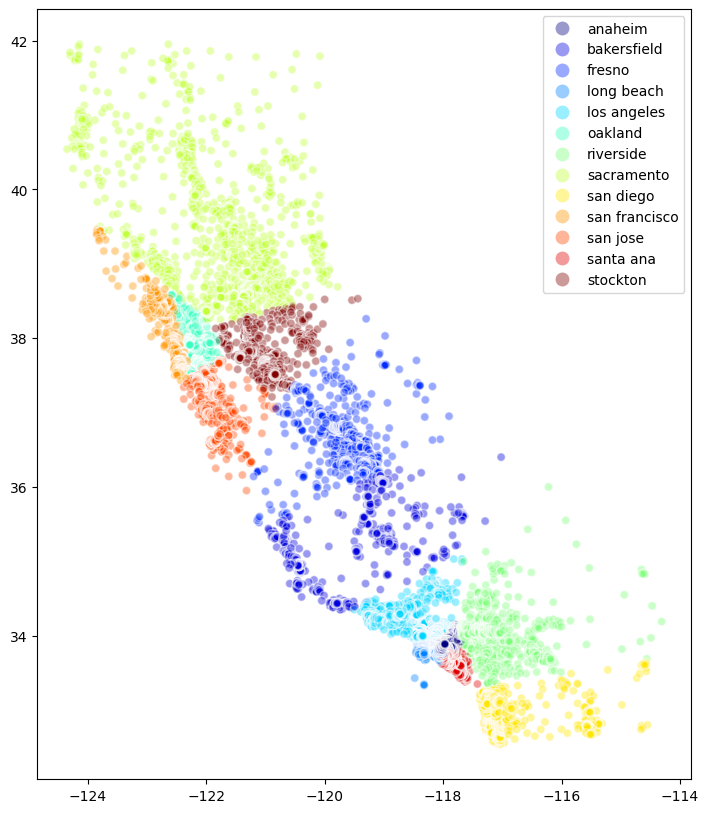

In [337]:
# Create a single subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# cali_shp.plot(color='grey', ax=ax, alpha=0.4, edgecolor='blue')

# Plot the geometry column of gdf on the ax
gdf.plot(column='min_distance_city_name', ax=ax, alpha=0.4, 
         edgecolor='white', legend=True, cmap='jet')

# Adjust the layout
# plt.tight_layout()

# Show the plot
plt.show()

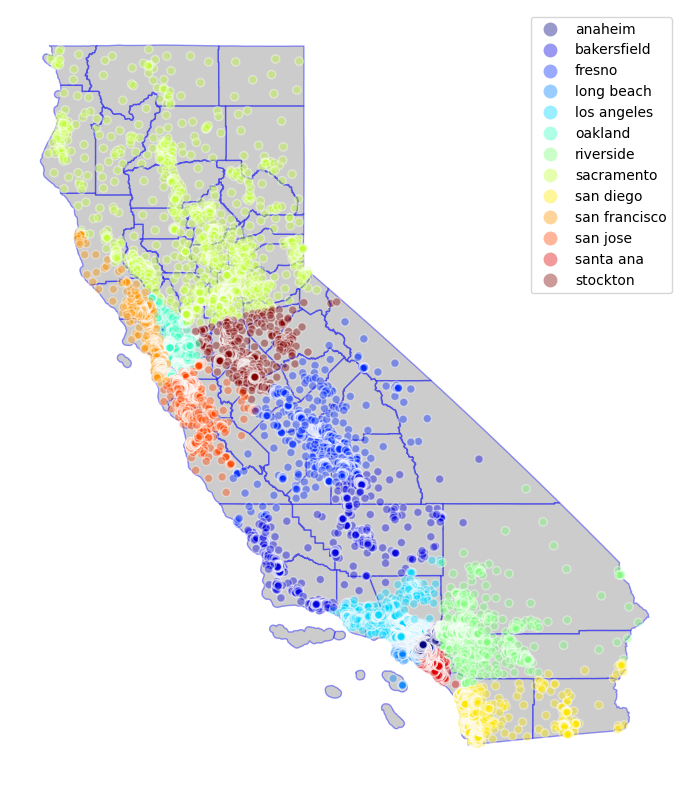

In [339]:
ax = cali_shp.plot(color='grey',figsize=(10, 10), alpha=0.4, edgecolor='blue')

# Plot the geometry column of gdf on the ax
gdf.plot(column='min_distance_city_name', ax=ax, alpha=0.4, 
         edgecolor='white', legend=True, cmap='jet')

# Show the plot
ax.axis('off')

plt.show()

In [340]:
gdf.head()

longitude  latitude  housing_median_age  population  median_income  \
0    -122.23     37.88                41.0       322.0         8.3252   
1    -122.22     37.86                21.0      2401.0         8.3014   
2    -122.24     37.85                52.0       496.0         7.2574   
3    -122.25     37.85                52.0       558.0         5.6431   
4    -122.25     37.85                52.0       565.0         3.8462   

   median_house_value ocean_proximity  rooms_per_household  bedrooms_per_room  \
0            452600.0        NEAR BAY             6.984127           0.146591   
1            358500.0        NEAR BAY             6.238137           0.155797   
2            352100.0        NEAR BAY             8.288136           0.129516   
3            341300.0        NEAR BAY             5.817352           0.184458   
4            342200.0        NEAR BAY             6.281853           0.172096   

   population_per_household                     geometry  min_distance  \
0                  2.555556  POINT (-122.23000 37.88000)      9.141880   
1                  2.109842  POINT (-122.22000 37.86000)      7.640713   
2                  2.802260  POINT (-122.24000 37.85000)      5.758511   
3                  2.547945  POINT (-122.25000 37.85000)      5.395591   
4                  2.181467  POINT (-122.25000 37.85000)      5.395591   

   max_distance min_distance_city_name max_distance_city_name  
0    735.398456                oakland              san diego  
1    733.137188                oakland              san diego  
2    733.435457                oakland              san diego  
3    734.008122                oakland              san diego  
4    734.008122                oakland              san diego

In [349]:
large_cities.head()

Name   Latitude   Longitude  pop_april_1980  pop_april_1990  \
9        Anaheim  33.835292 -117.914503        219494.0        266406.0   
24   Bakersfield  35.373292 -119.018711        105611.0        174820.0   
143       Fresno  36.746842 -119.772586        217129.0        354202.0   
226   Long Beach  33.768322 -118.195617        361355.0        429433.0   
229  Los Angeles  34.052233 -118.243686       2968579.0       3485398.0   

     pop_april_2000  pop_april_2010                     geometry  Large_City  
9          328014.0        336265.0  POINT (-117.91450 33.83529)        True  
24         246889.0        347483.0  POINT (-119.01871 35.37329)        True  
143        427652.0        494665.0  POINT (-119.77259 36.74684)        True  
226        461522.0        462257.0  POINT (-118.19562 33.76832)        True  
229       3694742.0       3792621.0  POINT (-118.24369 34.05223)        True

In [361]:
# We now need to get the population of the city that is closest to each row
# We can do this by merging the gdf with the large_cities dataframe
# We'll need to rename the columns in large_cities to match the column names in gdf
# We'll also need to drop the geometry column from large_cities
# We'll also need to drop the geometry column from gdf

# Rename the columns in large_cities
# large_cities = large_cities.rename(columns={'Name': 'min_distance_city_name'})
large_cities = large_cities.rename(columns={'min_distance_city_name': 'city_name'})
large_cities['min_distance_city_name'] = large_cities['min_distance_city_name'].apply(lambda x: x.lower())
large_cities.reset_index(inplace=True)
# large_cities.drop(columns=['index'], inplace=True)
large_cities.head(len(large_cities))

city_name   Latitude   Longitude  pop_april_1980  pop_april_1990  \
0         anaheim  33.835292 -117.914503        219494.0        266406.0   
1     bakersfield  35.373292 -119.018711        105611.0        174820.0   
2          fresno  36.746842 -119.772586        217129.0        354202.0   
3      long beach  33.768322 -118.195617        361355.0        429433.0   
4     los angeles  34.052233 -118.243686       2968579.0       3485398.0   
5         oakland  37.804364 -122.271114        339337.0        372242.0   
6       riverside  33.953350 -117.396156        170591.0        226505.0   
7      sacramento  38.581572 -121.494400        275741.0        369365.0   
8       san diego  32.715328 -117.157256        875538.0       1110549.0   
9   san francisco  37.774931 -122.419417        678974.0        723959.0   
10       san jose  37.339386 -121.894956        629531.0        782248.0   
11      santa ana  33.745572 -117.867833        204023.0        293742.0   
12       stockton  37.957703 -121.290781        148283.0        210943.0   

    pop_april_2000  pop_april_2010                     geometry  Large_City  
0         328014.0        336265.0  POINT (-117.91450 33.83529)        True  
1         246889.0        347483.0  POINT (-119.01871 35.37329)        True  
2         427652.0        494665.0  POINT (-119.77259 36.74684)        True  
3         461522.0        462257.0  POINT (-118.19562 33.76832)        True  
4        3694742.0       3792621.0  POINT (-118.24369 34.05223)        True  
5         399484.0        390724.0  POINT (-122.27111 37.80436)        True  
6         255166.0        303871.0  POINT (-117.39616 33.95335)        True  
7         407018.0        466488.0  POINT (-121.49440 38.58157)        True  
8        1223400.0       1307402.0  POINT (-117.15726 32.71533)        True  
9         776733.0        805235.0  POINT (-122.41942 37.77493)        True  
10        894943.0        945942.0  POINT (-121.89496 37.33939)        True  
11        337977.0        324528.0  POINT (-117.86783 33.74557)        True  
12        243771.0        291707.0  POINT (-121.29078 37.95770)        True

In [380]:
merged_gdf = gdf.merge(large_cities, how='left', left_on='min_distance_city_name', right_on='city_name')
merged_gdf.rename(columns={'geometry_x': 'geometry_target','geometry_y': 'geometry_city', 'city_name': 'min_dist_city_name'}, inplace=True)
merged_gdf.head()
# merged_gdf.columns

longitude  latitude  housing_median_age  population  median_income  \
0    -122.23     37.88                41.0       322.0         8.3252   
1    -122.22     37.86                21.0      2401.0         8.3014   
2    -122.24     37.85                52.0       496.0         7.2574   
3    -122.25     37.85                52.0       558.0         5.6431   
4    -122.25     37.85                52.0       565.0         3.8462   

   median_house_value ocean_proximity  rooms_per_household  bedrooms_per_room  \
0            452600.0        NEAR BAY             6.984127           0.146591   
1            358500.0        NEAR BAY             6.238137           0.155797   
2            352100.0        NEAR BAY             8.288136           0.129516   
3            341300.0        NEAR BAY             5.817352           0.184458   
4            342200.0        NEAR BAY             6.281853           0.172096   

   population_per_household  ... max_distance_city_name  min_dist_city_name  \
0                  2.555556  ...              san diego             oakland   
1                  2.109842  ...              san diego             oakland   
2                  2.802260  ...              san diego             oakland   
3                  2.547945  ...              san diego             oakland   
4                  2.181467  ...              san diego             oakland   

    Latitude   Longitude pop_april_1980 pop_april_1990  pop_april_2000  \
0  37.804364 -122.271114       339337.0       372242.0        399484.0   
1  37.804364 -122.271114       339337.0       372242.0        399484.0   
2  37.804364 -122.271114       339337.0       372242.0        399484.0   
3  37.804364 -122.271114       339337.0       372242.0        399484.0   
4  37.804364 -122.271114       339337.0       372242.0        399484.0   

   pop_april_2010                geometry_city  Large_City  
0        390724.0  POINT (-122.27111 37.80436)        True  
1        390724.0  POINT (-122.27111 37.80436)        True  
2        390724.0  POINT (-122.27111 37.80436)        True  
3        390724.0  POINT (-122.27111 37.80436)        True  
4        390724.0  POINT (-122.27111 37.80436)        True  

[5 rows x 24 columns]

In [381]:
# We can now drop geometry columns, city_name, and min_distance_city_name, max_distance_city_name, Large_City
merged_gdf.drop(columns=['longitude','latitude', 'Latitude', 'Longitude', 'geometry_target', 'geometry_city','max_distance', 'min_distance_city_name', 'max_distance_city_name', 'Large_City'], inplace=True)
merged_gdf.rename(columns={'pop_april_1980':'min_dist_city_pop_april_1980', 'pop_april_1990':'min_dist_city_pop_april_1990', 'pop_april_2000':'min_dist_city_pop_april_2000', 'pop_april_2010':'min_dist_city_pop_april_2010', 'pop_april_2020':'min_dist_city_pop_april_2020'}, inplace=True)
merged_gdf.head()

housing_median_age  population  median_income  median_house_value  \
0                41.0       322.0         8.3252            452600.0   
1                21.0      2401.0         8.3014            358500.0   
2                52.0       496.0         7.2574            352100.0   
3                52.0       558.0         5.6431            341300.0   
4                52.0       565.0         3.8462            342200.0   

  ocean_proximity  rooms_per_household  bedrooms_per_room  \
0        NEAR BAY             6.984127           0.146591   
1        NEAR BAY             6.238137           0.155797   
2        NEAR BAY             8.288136           0.129516   
3        NEAR BAY             5.817352           0.184458   
4        NEAR BAY             6.281853           0.172096   

   population_per_household  min_distance min_dist_city_name  \
0                  2.555556      9.141880            oakland   
1                  2.109842      7.640713            oakland   
2                  2.802260      5.758511            oakland   
3                  2.547945      5.395591            oakland   
4                  2.181467      5.395591            oakland   

   min_dist_city_pop_april_1980  min_dist_city_pop_april_1990  \
0                      339337.0                      372242.0   
1                      339337.0                      372242.0   
2                      339337.0                      372242.0   
3                      339337.0                      372242.0   
4                      339337.0                      372242.0   

   min_dist_city_pop_april_2000  min_dist_city_pop_april_2010  
0                      399484.0                      390724.0  
1                      399484.0                      390724.0  
2                      399484.0                      390724.0  
3                      399484.0                      390724.0  
4                      399484.0                      390724.0

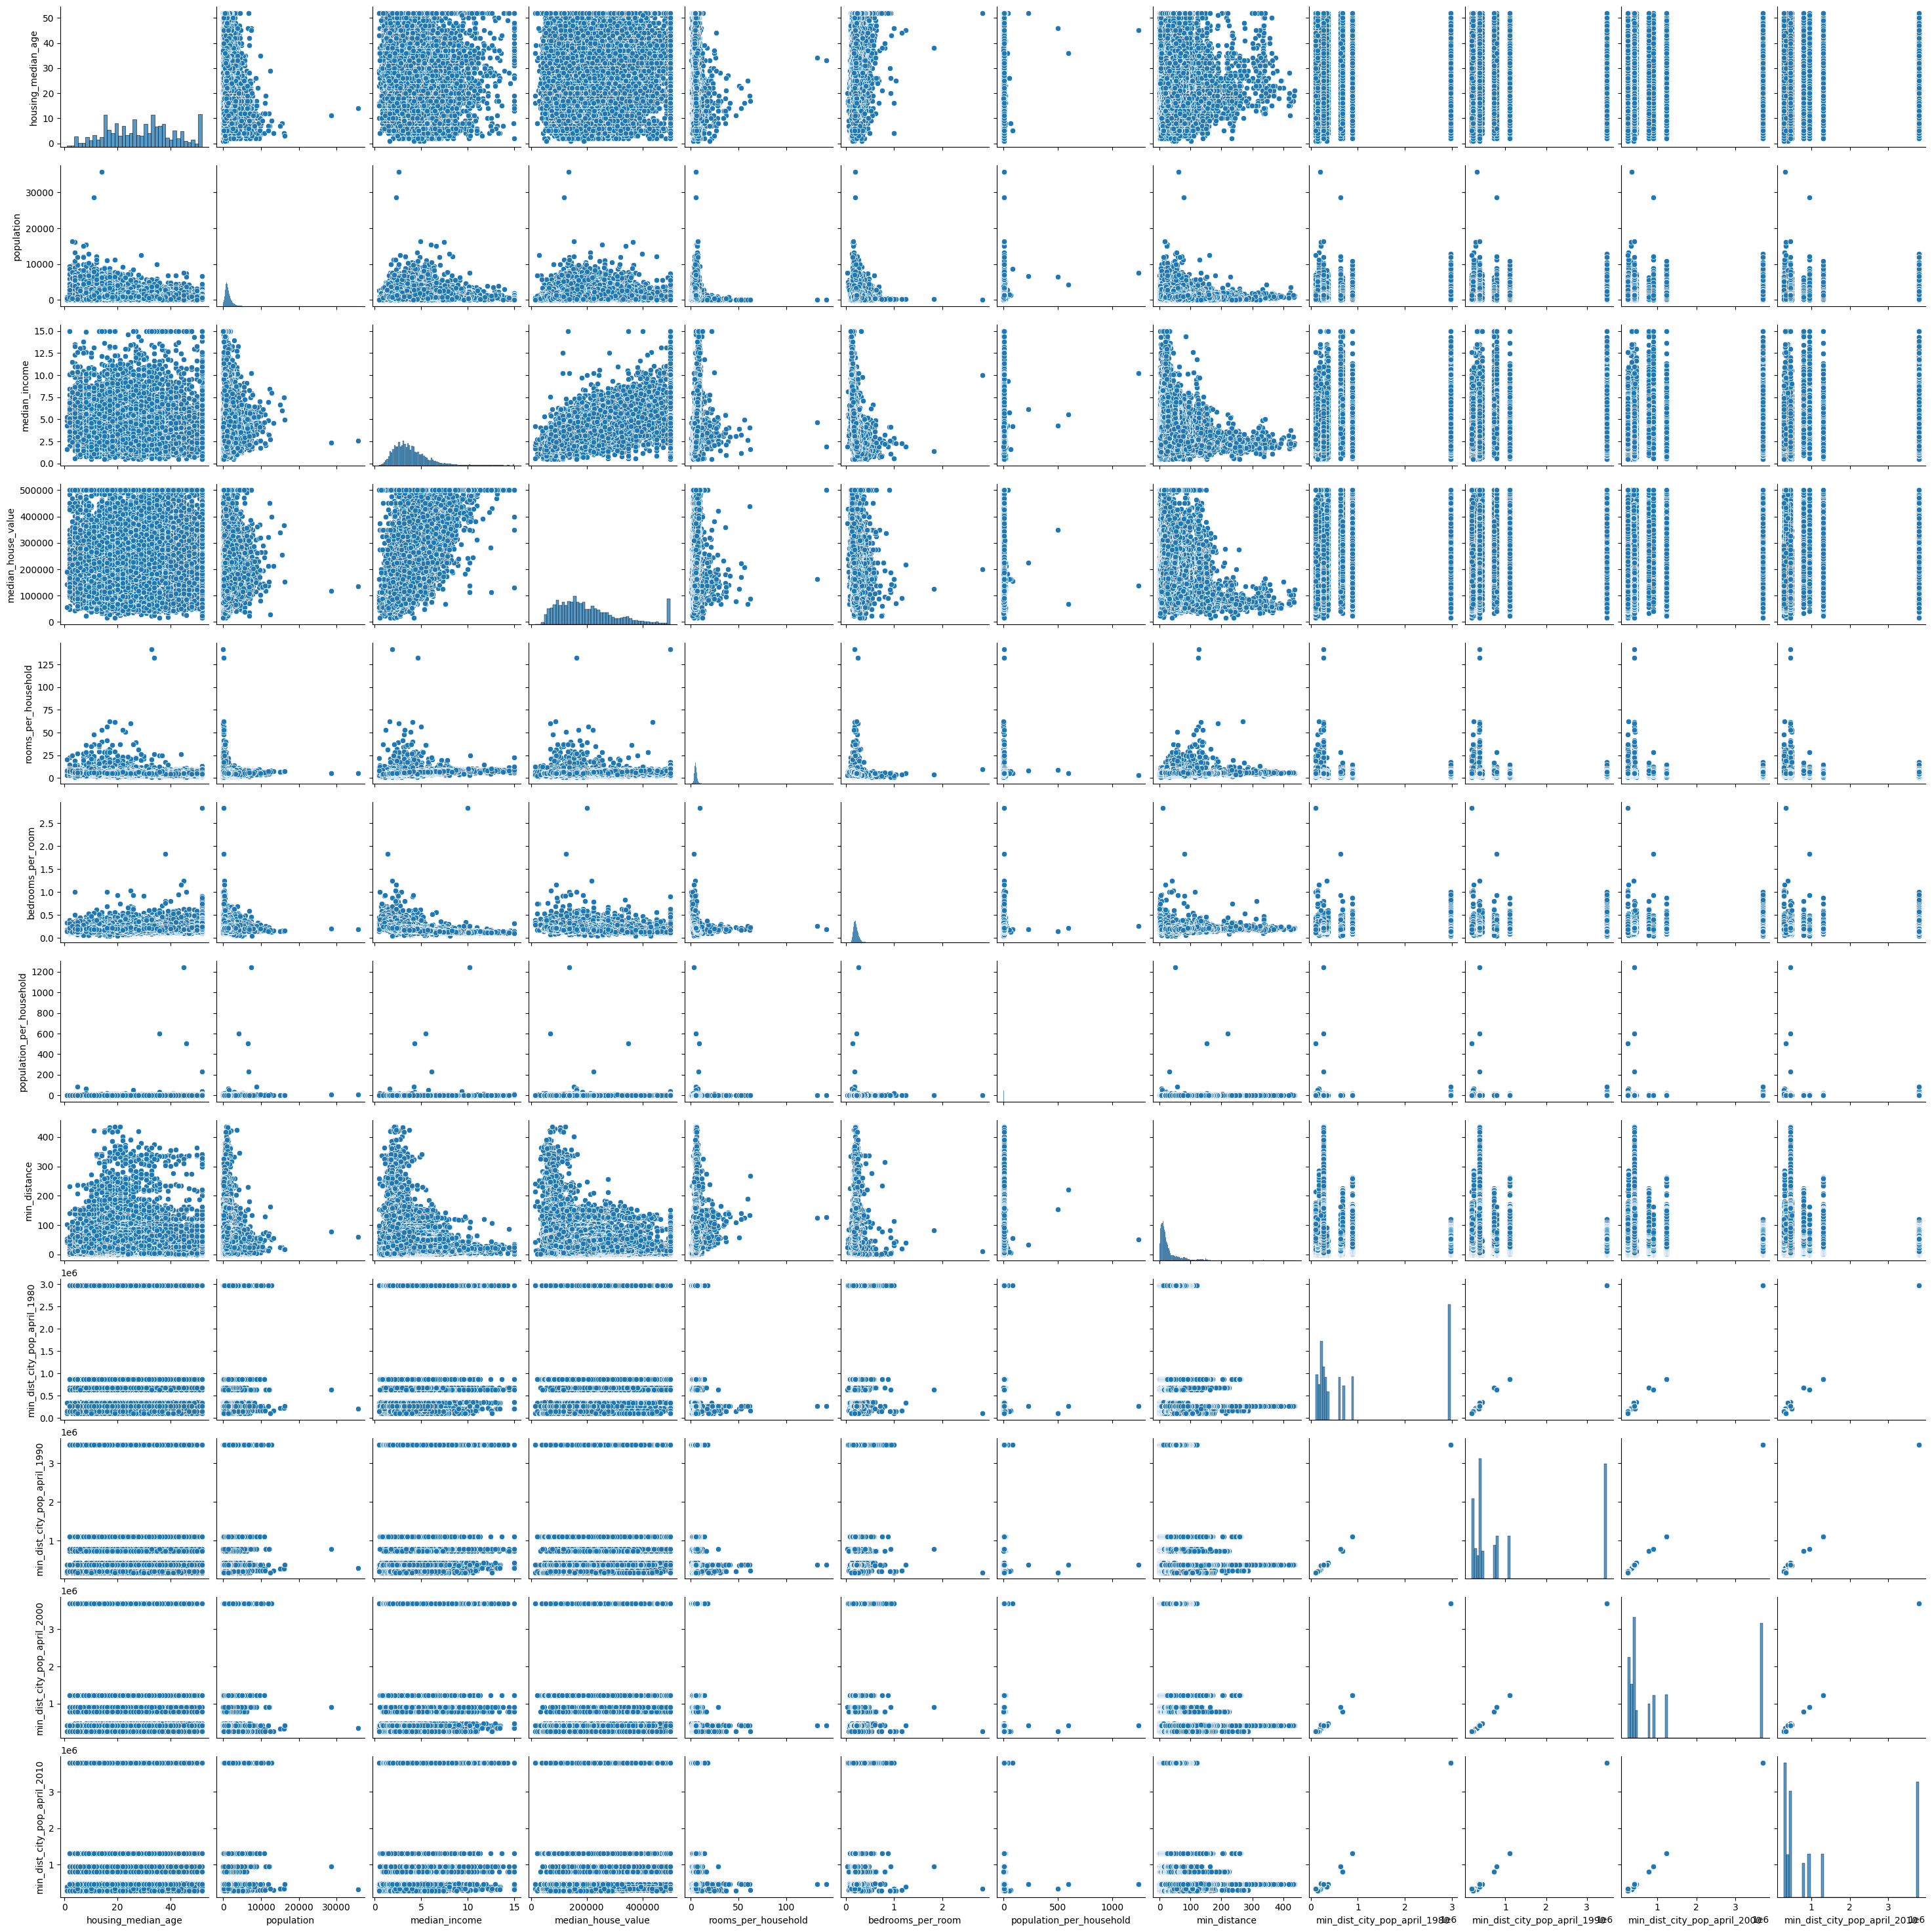

In [382]:
# We now have to feature engineer ocean_proximity to be a categorical variable, and then one-hot encode it
# We'll also need to drop the ocean_proximity column
# We'll also need to remove outliers from columns as well
number_cols = merged_gdf.select_dtypes(include=np.number)
# let's look at the scatter plots of the variables that are highly correlated
sns.pairplot(number_cols)
plt.show()

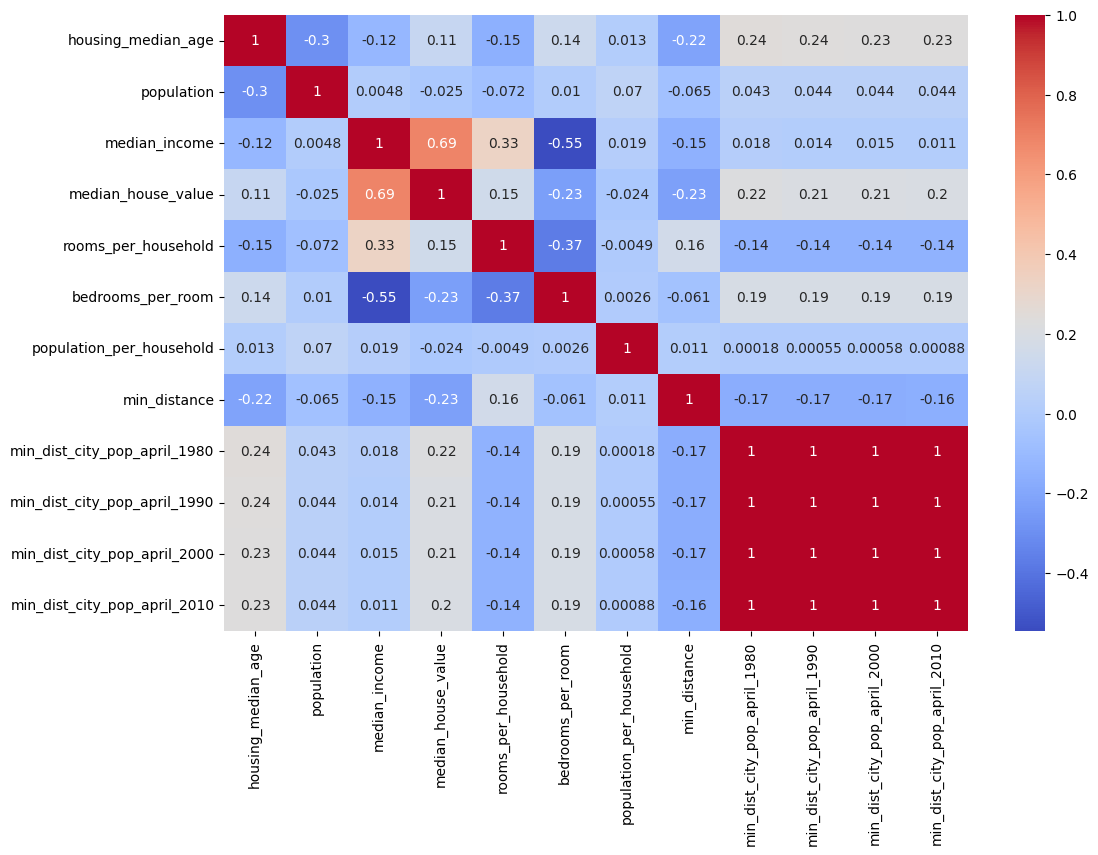

In [383]:
plt.figure(figsize=(12, 8))
number_cols = merged_gdf.select_dtypes(include=np.number)
sns.heatmap(number_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

In [384]:
# because of this plot we need to drop the following columns:
# min_dist_city_pop_april_1980, min_dist_city_pop_april_1990, min_dist_city_pop_april_2000

merged_gdf.drop(columns=['min_dist_city_pop_april_1980', 'min_dist_city_pop_april_1990', 'min_dist_city_pop_april_2000'], inplace=True)
merged_gdf.head()

housing_median_age  population  median_income  median_house_value  \
0                41.0       322.0         8.3252            452600.0   
1                21.0      2401.0         8.3014            358500.0   
2                52.0       496.0         7.2574            352100.0   
3                52.0       558.0         5.6431            341300.0   
4                52.0       565.0         3.8462            342200.0   

  ocean_proximity  rooms_per_household  bedrooms_per_room  \
0        NEAR BAY             6.984127           0.146591   
1        NEAR BAY             6.238137           0.155797   
2        NEAR BAY             8.288136           0.129516   
3        NEAR BAY             5.817352           0.184458   
4        NEAR BAY             6.281853           0.172096   

   population_per_household  min_distance min_dist_city_name  \
0                  2.555556      9.141880            oakland   
1                  2.109842      7.640713            oakland   
2                  2.802260      5.758511            oakland   
3                  2.547945      5.395591            oakland   
4                  2.181467      5.395591            oakland   

   min_dist_city_pop_april_2010  
0                      390724.0  
1                      390724.0  
2                      390724.0  
3                      390724.0  
4                      390724.0

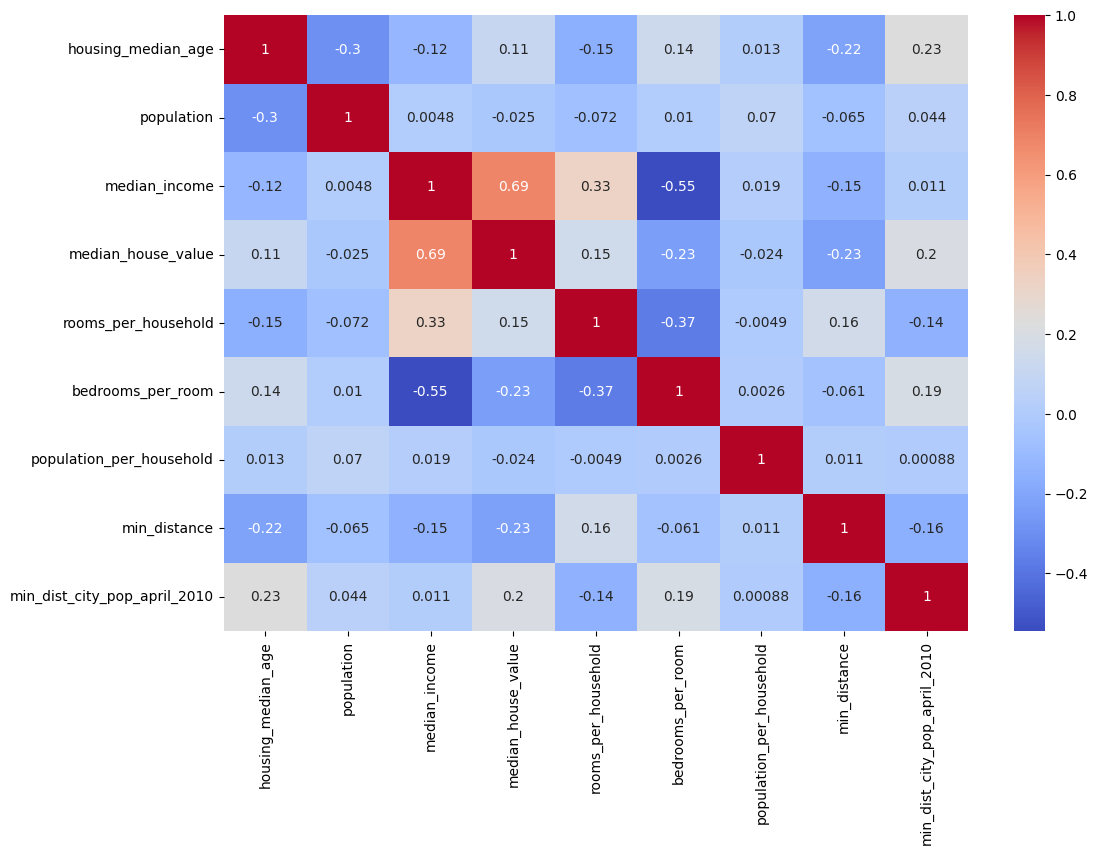

In [386]:
plt.figure(figsize=(12, 8))
number_cols = merged_gdf.select_dtypes(include=np.number)
sns.heatmap(number_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

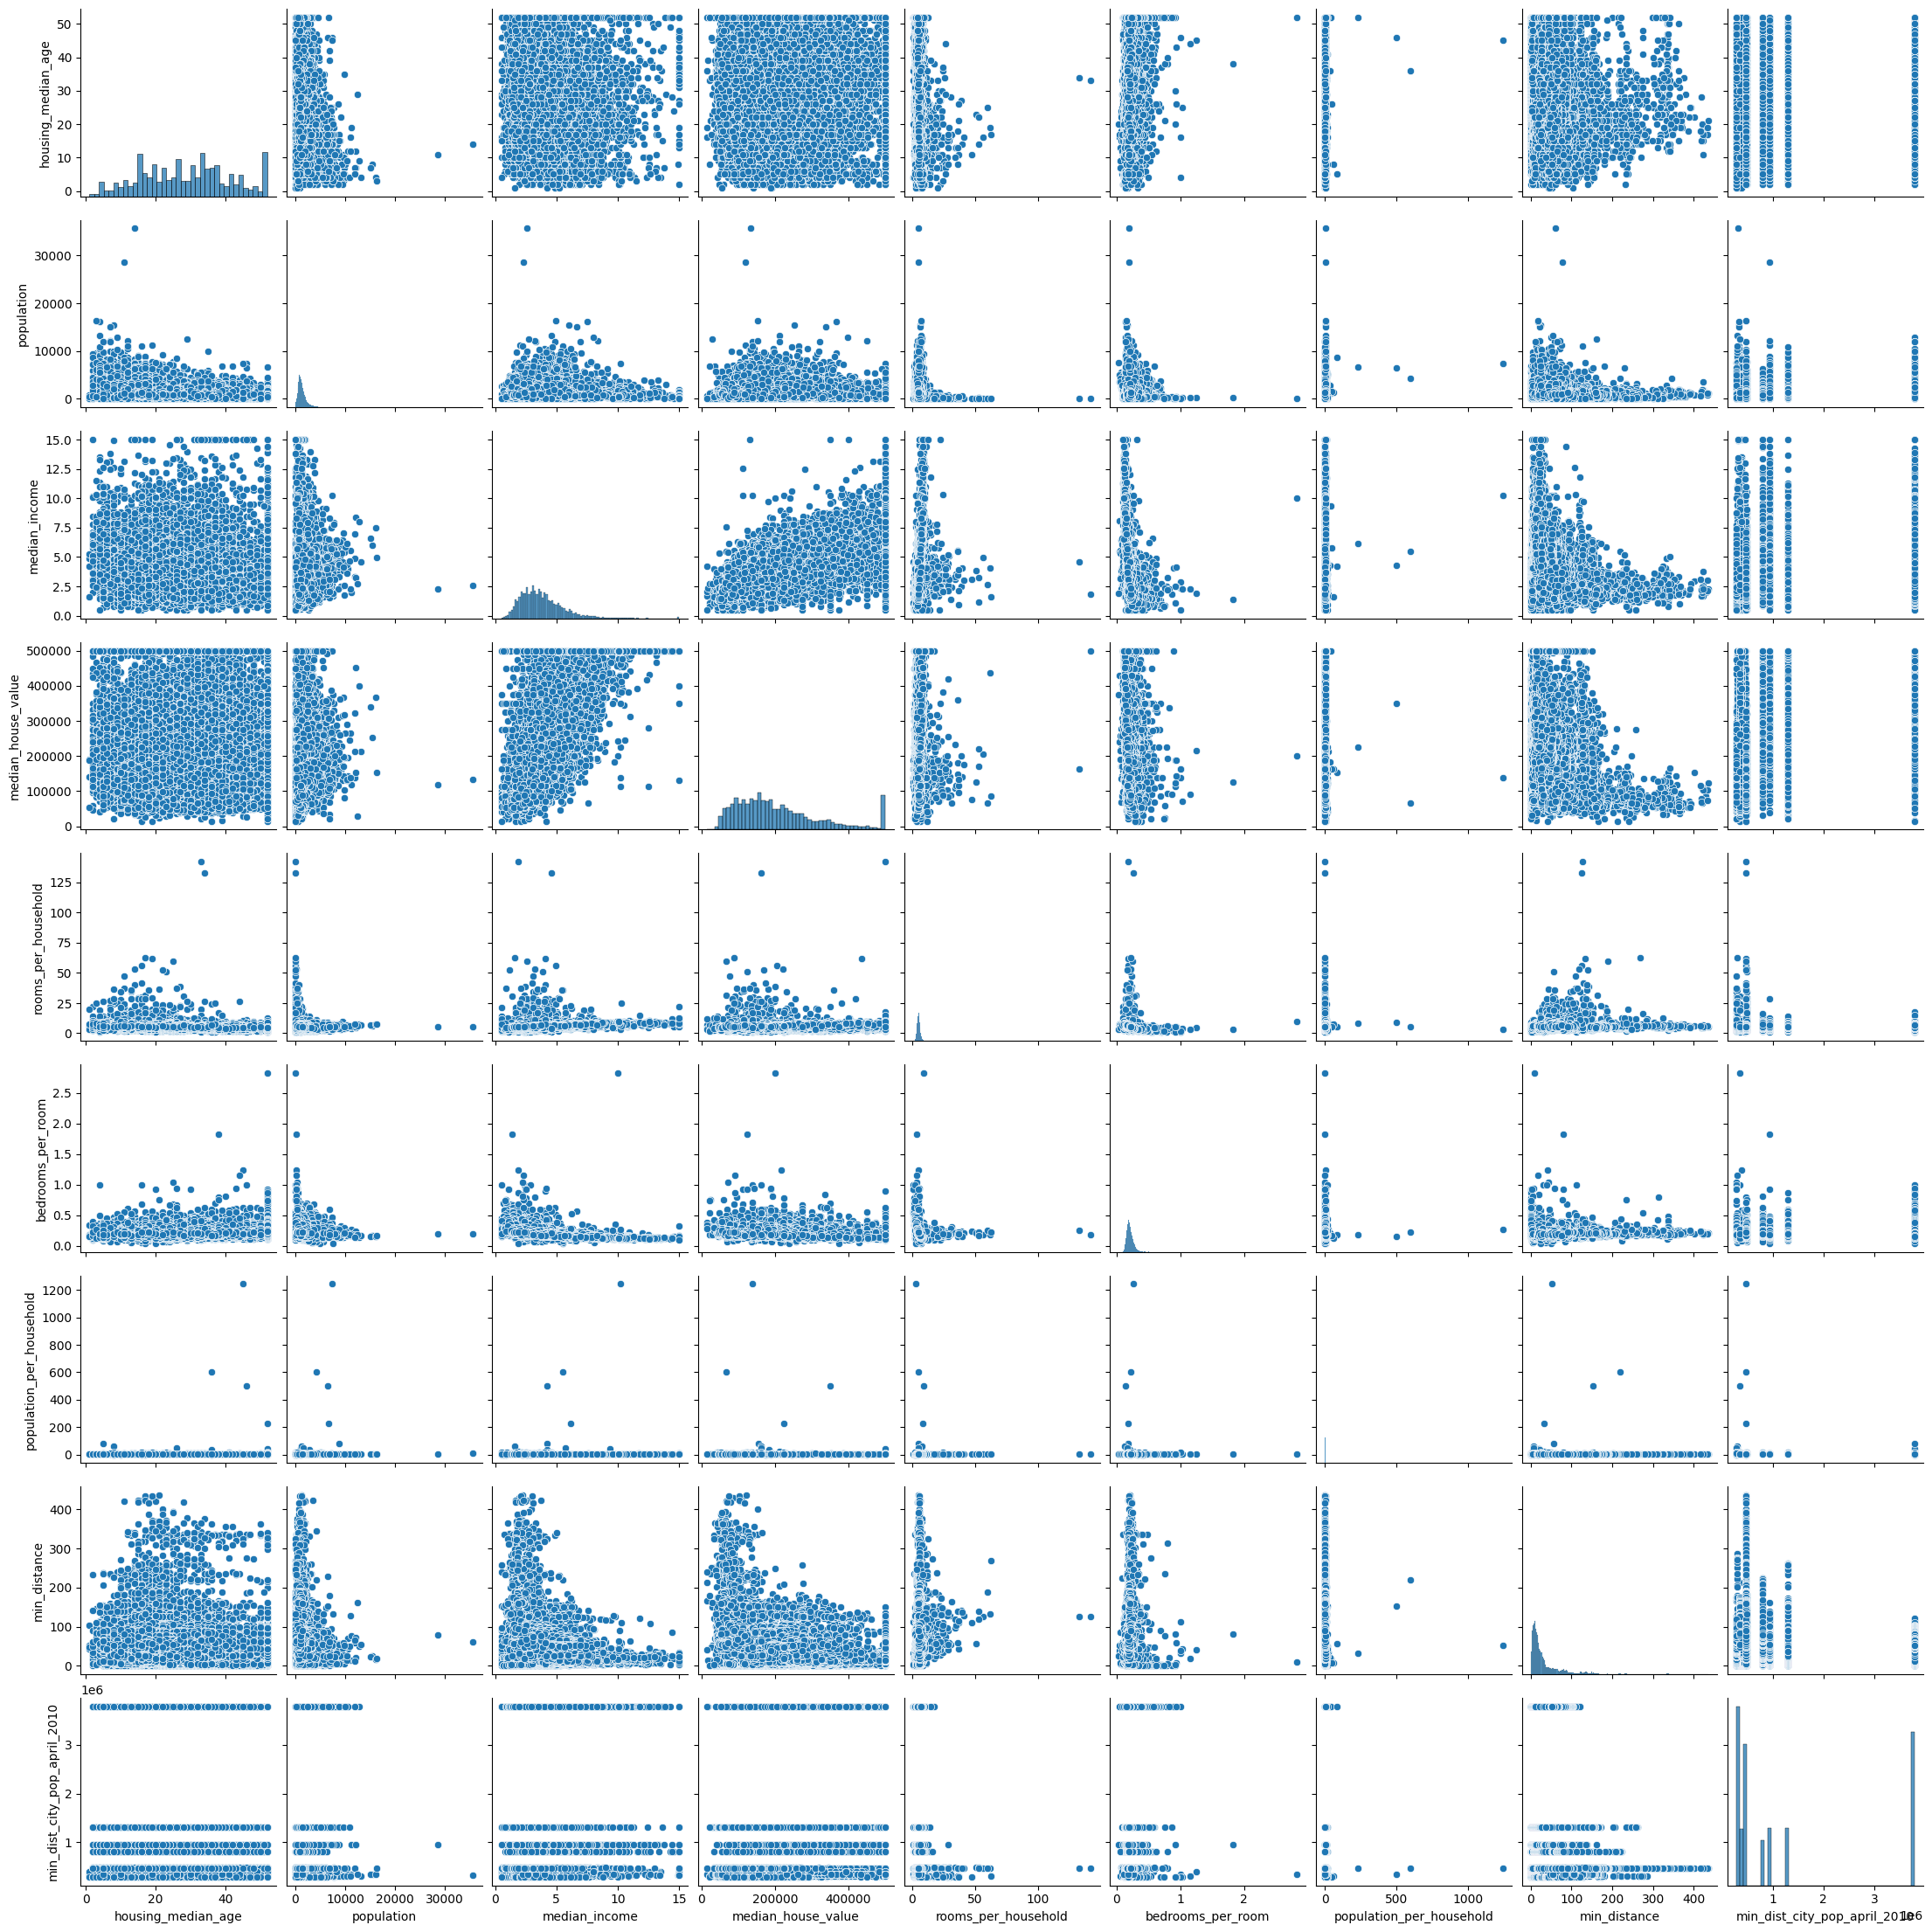

In [387]:
number_cols = merged_gdf.select_dtypes(include=np.number)
# let's look at the scatter plots of the variables that are highly correlated
sns.pairplot(number_cols)
plt.show()

In [394]:
# We now need to feature engineer ocean_proximity to be a categorical variable, and then one-hot encode it
# We'll also need to drop the ocean_proximity column

# merged_gdf['ocean_proximity_category'] = merged_gdf['ocean_proximity'].astype('category')
# merged_gdf['ocean_proximity_category'] = merged_gdf['ocean_proximity_categroy'].cat.codes

# merged_gdf['min_dist_city_name_category'] = merged_gdf['min_dist_city_name'].astype('category')
# merged_gdf['min_dist_city_name_category'] = merged_gdf['min_dist_city_name_category'].cat.codes



# merged_gdf.drop(columns=['ocean_proximity', 'min_dist_city_name'], inplace=True)

merged_gdf.head()
# merged_gdf['ocean_proximity_categroy'].value_counts()

housing_median_age  population  median_income  median_house_value  \
0                41.0       322.0         8.3252            452600.0   
1                21.0      2401.0         8.3014            358500.0   
2                52.0       496.0         7.2574            352100.0   
3                52.0       558.0         5.6431            341300.0   
4                52.0       565.0         3.8462            342200.0   

   rooms_per_household  bedrooms_per_room  population_per_household  \
0             6.984127           0.146591                  2.555556   
1             6.238137           0.155797                  2.109842   
2             8.288136           0.129516                  2.802260   
3             5.817352           0.184458                  2.547945   
4             6.281853           0.172096                  2.181467   

   min_distance min_dist_city_name  min_dist_city_pop_april_2010  \
0      9.141880            oakland                      390724.0   
1      7.640713            oakland                      390724.0   
2      5.758511            oakland                      390724.0   
3      5.395591            oakland                      390724.0   
4      5.395591            oakland                      390724.0   

   ocean_proximity_categroy  
0                         2  
1                         2  
2                         2  
3                         2  
4                         2